# 数据读取

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
family2014 = pd.read_csv('数据/居民出行数据/2014/family_2014.csv',dtype=str)
travel2014 = pd.read_csv('数据/居民出行数据/2014/midtable_2014.csv',dtype=str)
familymember_2014 = pd.read_csv('数据/居民出行数据/2014/family_member_2014.csv',dtype=str)

In [3]:
family2023 = pd.read_csv('数据/居民出行数据/2023/family_total_33169.csv',dtype=str)
travel2023 = pd.read_csv('数据/居民出行数据/2023/midtable_total_33169.csv',dtype=str)
familymember_2023 = pd.read_csv('数据/居民出行数据/2023/familymember_total_33169.csv',dtype=str)

In [4]:
family_cluster = pd.read_csv('数据/family_cluster_new.csv',dtype=str)

## 家庭变量筛选

In [5]:
valid_member_number = familymember_2023.groupby('家庭编号').size().rename('家庭成员数量_real').reset_index()
family2023 = pd.merge(family2023, valid_member_number, on='家庭编号', how='left')
family2023 = family2023[family2023['家庭成员数量'].astype(int) == family2023['家庭成员数量_real']]

In [6]:
valid_family = family2023[['家庭编号']]

In [7]:
familymember_2023 = pd.merge(familymember_2023, valid_family, on='家庭编号', how='inner')

In [8]:
family2023[['家庭成员数量']].value_counts()

家庭成员数量
2         16027
3          9865
1          4120
4          2388
5           698
6            66
7             2
Name: count, dtype: int64

In [9]:
## 家庭连续型变量
family2023[['家庭成员数量','家庭工作人口数','机动车数量','脚踏自行车数量','电动自行车数量','摩托车数量','老年代步车数量']]

,家庭成员数量,家庭工作人口数,机动车数量,脚踏自行车数量,电动自行车数量,摩托车数量,老年代步车数量
0,3,2,1,3,0,0,0
1,2,2,1,1,0,0,0
2,2,2,1,0,1,0,0
3,3,2,1,1,1,0,0
4,2,2,1,1,2,0,0
...,...,...,...,...,...,...,...
33164,1,0,0,1,0,0,0
33165,3,1,0,2,1,0,0
33166,3,2,1,1,1,0,0
33167,3,2,1,1,1,0,0


In [10]:
have_student_family = familymember_2023[familymember_2023['职业'] == '14'].drop_duplicates(['家庭编号'])[['家庭编号']]
have_student_family['have_student'] = 1

In [11]:
family2023 = pd.merge(family2023, have_student_family, on='家庭编号', how='left').fillna({'have_student':0})

In [12]:
## 家庭离散型变量
family2023[['have_student','家庭年收入']]

,have_student,家庭年收入
0,0.0,E
1,0.0,C
2,0.0,D
3,1.0,G
4,0.0,B
...,...,...
33161,0.0,B
33162,0.0,C
33163,1.0,D
33164,0.0,E


In [13]:
family2023['家庭年收入'].isna().sum()

0

## 个人变量筛选

In [14]:
familymember_2023['age'] = 2023 - familymember_2023['出生年份'].astype(int)
familymember_2023['age_group'] = pd.cut(familymember_2023['age'], bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100], right=False, labels=['0-5','6-10','11-15','16-20','21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61-65','66-70','71-75','76-80','81-85','86-90','91-95','96-100'])

In [15]:
familymember_2023['age'].max() , familymember_2023['age'].min()

(123, 0)

In [16]:
# familymember_2023['age'] = (familymember_2023['age'] - familymember_2023['age'].min()) / (familymember_2023['age'].max() - familymember_2023['age'].min())

In [17]:
## 连续型变量
familymember_2023[['age']]

,age
0,43
1,90
2,59
3,72
4,12
...,...
79216,46
79217,35
79218,18
79219,35


In [18]:
(familymember_2023[familymember_2023['关系']=='0']['age']).describe()

count    33050.000000
mean        49.398669
std         14.306272
min          2.000000
25%         38.000000
50%         48.000000
75%         61.000000
max        120.000000
Name: age, dtype: float64

In [19]:
familymember_2023.loc[familymember_2023['最高学历'].isna(),'最高学历'] = familymember_2023.loc[familymember_2023['最高学历'].isna(),'教育阶段']

In [20]:
## 离散型变量,这里的关系有点不太对，有的户主很小
familymember_2023[['性别','是否有驾照','关系','最高学历','职业']]

,性别,是否有驾照,关系,最高学历,职业
0,2,0,0,6,11
1,2,0,2,2,15
2,2,0,0,6,15
3,2,0,0,3,15
4,1,NaN,9,2,14
...,...,...,...,...,...
79216,2,0,0,6,3
79217,1,0,0,6,2
79218,1,0,0,6,3
79219,1,1,0,6,8


In [21]:
familymember_2023['是否有驾照'] = familymember_2023['是否有驾照'].fillna('0')

## 图编码

In [25]:
import numpy as np

In [26]:
familymember_2023 = pd.merge(familymember_2023, familymember_2023.groupby('家庭编号').size().rename('家庭成员数量').reset_index())

In [28]:
adj_list = []
node_feature_list = []
edge_feature_list = []

In [29]:
atom_types = ['Male_Child', 'Female_Child', 'Male_Adult', 'Female_Adult', 'Male_Elder', 'Female_Elder']
family_relation_types = ['SPOUSE', 'PARENT_CHILD',  'GRANDPARENT_GRANDCHILD', 'SIBLING', 'EXTENDED_FAMILY']

In [30]:
familymember_2023['real_age'] = familymember_2023['age']

In [31]:
def judge_relation_type(relation):
    if relation in [set(['0','0']),set(['17','17']),set(['0','17']),set(['1', '2']),set(['13', '14']),set(['15', '16'])]:
        return [1,0,0,0,0]  # SPOUSE
    elif relation in [set(['1', '0']), set(['2', '0']), set(['1', '17']), set(['2', '17']), set(['0', '5']), set(['0', '6']), set(['17', '5']), set(['17', '6']), set(['13', '1']), set(['14', '1']), set(['15', '2']), set(['16', '2']),  set(['1', '7']), set(['1', '8']), set(['2', '7']), set(['2', '8'])]:
        return [0,1,0,0,0]  # PARENT_CHILD
    elif relation in [set(['0', '13']), set(['0', '14']),set(['0', '15']), set(['0', '16']),set(['17', '13']), set(['17', '14']),set(['17', '15']), set(['17', '16']),set(['1', '5']), set(['1', '6']), set(['2', '5']), set(['2', '6']), set(['0', '9']), set(['0', '10']), set(['17', '9']), set(['17', '10']),set(['7', '13']), set(['7', '14']),set(['7', '15']), set(['7', '16']),set(['8', '13']), set(['8', '14']),set(['8', '15']), set(['8', '16'])]:
        return [0,0,1,0,0]  # GRANDPARENT_GRANDCHILD
    elif relation in [set(['0', '7']), set(['0', '8']), set(['17', '7']), set(['17', '8']), set(['5', '6']), set(['9', '10']), set(['7', '8']),set(['7', '7']),set(['8', '8']), set(['5', '5']), set(['6', '6']),set(['9', '9']),set(['10', '10'])]:
        return [0,0,0,1,0]  # SIBLING
    else:
        return [0,0,0,0,1]  # EXTENDED_FAMILY

In [32]:
def judge_node_type(row):
    if row['性别'] == '1' and row['real_age'] < 18:
        return [1, 0, 0, 0, 0, 0]
    elif row['性别'] == '2' and row['real_age'] < 18:
        return [0, 1, 0, 0, 0, 0]
    elif row['性别'] == '1' and 18 <= row['real_age'] < 60:
        return [0, 0, 1, 0, 0, 0]
    elif row['性别'] == '2' and 18 <= row['real_age'] < 60:
        return [0, 0, 0, 1, 0, 0]
    elif row['性别'] == '1' and row['real_age'] >= 60:
        return [0, 0, 0, 0, 1, 0]
    elif row['性别'] == '2' and row['real_age'] >= 60:
        return [0, 0, 0, 0, 0, 1]
    else:
        return None

In [33]:
familymember_2023['node_type'] = familymember_2023.apply(judge_node_type, axis=1)

In [34]:
from itertools import combinations
from tqdm import tqdm

In [35]:
pair_wise_list = []

In [36]:
for i in tqdm(family2023['家庭编号'].unique()):
    tmp = familymember_2023[familymember_2023['家庭编号'] == i]
    pair_wise_list.extend(list(combinations(tmp['关系'].values,2)))

100%|██████████| 33166/33166 [02:22<00:00, 233.20it/s]


In [37]:
len(set(pair_wise_list))

171

In [38]:
total_relation = list(set(pair_wise_list))

In [39]:
total_relation = [set(i) for i in total_relation]

In [40]:
total_judge_result = pd.DataFrame([str(i) for i in total_relation],columns=['relation_pair'])

In [41]:
total_judge_result = pd.concat([total_judge_result, pd.DataFrame([str(judge_relation_type(i)) for i in total_relation],columns=['relation_type'])], axis=1)

In [42]:
total_judge_result

,relation_pair,relation_type
0,"{'15', '0'}","[0, 0, 1, 0, 0]"
1,"{'13', '17'}","[0, 0, 1, 0, 0]"
2,"{'17', '7'}","[0, 0, 0, 1, 0]"
3,"{'6', '2'}","[0, 0, 1, 0, 0]"
4,"{'12', '17'}","[0, 0, 0, 0, 1]"
...,...,...
166,"{'5', '2'}","[0, 0, 1, 0, 0]"
167,"{'5', '1'}","[0, 0, 1, 0, 0]"
168,"{'5', '8'}","[0, 0, 0, 0, 1]"
169,"{'1', '2'}","[1, 0, 0, 0, 0]"


In [43]:
adj_list = []
node_feature_list = []
edge_feature_list = []

In [45]:
for i in tqdm(family2023['家庭编号'].unique()):
    tmp = familymember_2023[familymember_2023['家庭编号'] == i]
    tmp = tmp.sort_values('age', ascending=False)
    adj_matrix = np.zeros((8, 8))
    node_feature = np.zeros((8, len(atom_types)))
    edge_feature = np.zeros((8, 8, len(family_relation_types)))
    node_feature[:len(tmp), :] = np.array(tmp['node_type'].tolist())
    ## 邻接矩阵构建
    n = len(tmp)  # 矩阵大小
    A = np.ones((n, n)) - np.eye(n)
    adj_matrix[:n, :n] = A
    ## 边关系的构建
    for p_i in range(n):
        for p_j in range(n-1):
            if p_i == p_j:
                continue
            relation = set([tmp.iloc[p_i]['关系'], tmp.iloc[p_j]['关系']])
            relation_type = judge_relation_type(relation)
            edge_feature[p_i, p_j, :] = relation_type
            edge_feature[p_j, p_i, :] = relation_type
    adj_list.append(adj_matrix)
    edge_feature_list.append(edge_feature)
    node_feature_list.append(node_feature)

  0%|          | 18/33166 [00:00<03:07, 177.26it/s]

100%|██████████| 33166/33166 [02:53<00:00, 191.38it/s]


In [46]:
np.save('数据/family_adj.npy', np.array(adj_list))
np.save('数据/familymember_relationship.npy', np.array(edge_feature_list))
np.save('数据/familymember_type.npy', np.array(node_feature_list))


## 变量编码

In [22]:
income_map = {'A':1, 'B':1, 'C':2, 'D':2, 'E':3, 'F':3, 'G':4, 'I':5, 'J':5, 'K':5}

In [23]:
family2023['家庭年收入'] = family2023['家庭年收入'].map(income_map)

In [24]:
familymember_2023['age_group'] = pd.cut(
    familymember_2023['age'], 
    bins=range(0, familymember_2023['age'].max() + 6, 5),
    labels=False 
)



In [25]:
familymember_2023['age_group'] = familymember_2023['age_group'].fillna(0)

In [27]:
familymember_2023['age'] = familymember_2023['age_group']

In [28]:
# relation_map = {'0':0, '17':1, '1':2, '2':2, '5':2, '6':2, '13':3, '14':3, '15':3, '16':3, '9':3, '10':3, '7':4, '8':4, '11':5, '12':5}
# education_map = {'1':1, '2':1, '3':2, '4':2, '5':3, '6':4, '7':5, '8':6, '9':7}
# occupation_map = {'1':1, '2':1, '3':1, '4':2, '5':2, '6':3, '7':2, '8':3, '9':1, '10':4, '11':4, '12':4, '13':5, '14':6, '15':7, '16':8, '17':8, '18':1, '19':1, '20':8}

# familymember_2023['关系'] = familymember_2023['关系'].map(relation_map)
# familymember_2023['最高学历'] = familymember_2023['最高学历'].map(education_map)
# familymember_2023['职业'] = familymember_2023['职业'].map(occupation_map)

In [29]:
familymember_2023['关系'].value_counts().shape, familymember_2023['最高学历'].value_counts().shape, familymember_2023['职业'].value_counts().shape

((16,), (9,), (20,))

In [26]:
from population_data_process_nonclip_reclass import *

/home/cranehh/anaconda3/envs/DiT/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:
## 家庭的变量编码
test = PopulationDataEncoder()

In [28]:
family2023 = pd.merge(family2023,family_cluster[['家庭编号','cluster']], on='家庭编号', how='left')

In [29]:
# 2. 拟合数据 (需要你的实际数据)
test.fit_family_data(family2023)
test.fit_person_data(familymember_2023)



In [34]:
encode_family_data = test.encode_family(family2023)
encode_member_data = test.encode_person(familymember_2023)

In [35]:
test.scalers['family_家庭成员数量'].mean_

array([2.38862088])

In [36]:
test.scalers['family_家庭成员数量'].scale_

array([0.88397094])

In [37]:
encode_family_data

{'family_家庭成员数量': array([ 0.69162808, -0.43963083, -0.43963083, ...,  0.69162808,
         0.69162808, -0.43963083]),
 'family_家庭工作人口数': array([0.81746303, 0.81746303, 0.81746303, ..., 0.81746303, 0.81746303,
        0.81746303]),
 'family_机动车数量': array([0.93622616, 0.93622616, 0.93622616, ..., 0.93622616, 0.93622616,
        0.93622616]),
 'family_脚踏自行车数量': array([ 3.77876167,  0.74396672, -0.77343075, ...,  0.74396672,
         0.74396672, -0.77343075]),
 'family_电动自行车数量': array([-1.27837079, -1.27837079,  0.27071381, ...,  0.27071381,
         0.27071381, -1.27837079]),
 'family_摩托车数量': array([-0.14970503, -0.14970503, -0.14970503, ..., -0.14970503,
        -0.14970503, -0.14970503]),
 'family_老年代步车数量': array([-0.33952242, -0.33952242, -0.33952242, ..., -0.33952242,
        -0.33952242, -0.33952242]),
 'family_家庭年收入': array([1.31626145, 0.10610657, 0.10610657, ..., 0.10610657, 1.31626145,
        0.10610657]),
 'family_have_student': array([[1., 0.],
        [1., 0.],
        [1., 0

In [38]:
# 3. 创建数据集
dataset_family, dataset_member = create_population_dataset(family2023, familymember_2023, test)

In [39]:
np.save('数据/family_sample_new_cluster.npy',dataset_family.numpy())
np.save('数据/family_member_sample_new_cluster.npy',dataset_member.numpy())


# 网络构建

In [144]:
import torch
import numpy as np

dataset_family = torch.from_numpy(np.load('数据/family_sample.npy'))
dataset_member = torch.from_numpy(np.load('数据/family_member_sample.npy'))

family_adj = np.load('数据/family_adj.npy')
familymember_relationship = np.load('数据/familymember_relationship.npy')
familymember_type = np.load('数据/familymember_type.npy')

In [145]:
dataset_family = dataset_family.to('cuda')
dataset_member = dataset_member.to('cuda')

In [146]:
from population_DiT import PopulationDiT

In [147]:
test = PopulationDiT().to('cuda')

In [148]:
t = torch.randint(0, 10, (100,), device='cuda')
family_final_result, person_final_result, relation_graph = test(dataset_family[:100], dataset_member[:100],t)

/mnt/d/OneDrive/Python scripts for big data/2025_05博士论文第一章-合成人口/GraphVAE-master/graph_vae/graph_datastructure.py:592: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525541702/work/aten/src/ATen/native/IndexingUtils.h:27.)
  adj_mat[msk.triu()] = adj_mat_logits.contiguous().view(-1)
/mnt/d/OneDrive/Python scripts for big data/2025_05博士论文第一章-合成人口/GraphVAE-master/graph_vae/graph_datastructure.py:594: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525541702/work/aten/src/ATen/native/IndexingUtils.h:27.)
  edge_attribute_tensor[msk[:, None, :, :].triu(diagonal=1).repeat(1,CHEM_DETAILS.num_bond_types, 1,1)] = edge_atr_logits.contiguous().view(-1)


In [159]:
person_mask = (torch.sum(dataset_member[:100,:,:],dim=-1)!=0)

In [149]:
source_data_family = dataset_family[:100]
source_data_member = dataset_member[:100]
source_data_adj = torch.from_numpy(family_adj[:100]).to('cuda')
source_data_edge = torch.from_numpy(familymember_relationship[:100]).to('cuda')
source_data_node = torch.from_numpy(familymember_type[:100]).to('cuda')

In [150]:
valid_person = torch.sum(source_data_node, dim=-1) != 0
num_nodes_active = torch.sum(valid_person, dim=-1, dtype=torch.float32)

In [151]:
a_norm_one = torch.sum(source_data_adj, dim=[1,2], dtype=torch.float32)

In [152]:
valid_edge = torch.sum(source_data_edge, dim=-1) != 0

In [153]:
import torch.nn.functional as F

In [154]:
family_continus_loss = F.mse_loss(
                            family_final_result[:, :7], 
                            source_data_family[:, :7],
                            reduction = "none"
                        )

family_continus_loss = torch.sum(family_continus_loss, dim=-1)

# 学生状态分类损失
family_student_loss = F.cross_entropy(
    family_final_result[:, 7:7+2],
    source_data_family[:, 7:7+2].argmax(dim=-1),
    reduction = "none"
)


# 收入类别分类损失  
family_income_loss = F.cross_entropy(
    family_final_result[:, 7+2:7+12],
    source_data_family[:, 7+2:7+12].argmax(dim=-1),
    reduction = "none"
)


In [ ]:


##学生损失
person_continus_loss = F.mse_loss(
    person_final_result[:,:, :1], 
    source_data_member[:,:, :1],
    reduction = "none"
).mean(dim=[1, 2])

## 离散类别状态损失
person_gender_loss = F.cross_entropy(
    person_final_result[:,:, 1:1+2].transpose(1, 2),
    source_data_member[:,:, 1:1+2].argmax(dim=-1),
    reduction = "none"
).mean(dim=-1)

person_license_loss = F.cross_entropy(
    person_final_result[:,:, 1+2:1+4].transpose(1, 2),
    source_data_member[:,:, 1+2:1+4].argmax(dim=-1),
    reduction = "none"
).mean(dim=-1)


person_relation_loss = F.cross_entropy(
    person_final_result[:,:, 1+4:1+20].transpose(1, 2),
    source_data_member[:,:, 1+4:1+20].argmax(dim=-1),
    reduction = "none"
).mean(dim=-1)

person_education_loss = F.cross_entropy(
    person_final_result[:,:, 1+20:1+29].transpose(1, 2),
    source_data_member[:,:, 1+20:1+29].argmax(dim=-1),
    reduction = "none"
).mean(dim=-1)

person_occupation_loss = F.cross_entropy(
    person_final_result[:,:, 1+29:1+49].transpose(1, 2),
    source_data_member[:,:, 1+29:1+49].argmax(dim=-1),
    reduction = "none"
).mean(dim=-1)

In [154]:
def compute_adjacency_loss(decoder_adj_logits, true_adj_matrix):
    """
    邻接矩阵二元交叉熵损失 - 基于GraphVAE实现
    
    Args:
        decoder_adj_logits: [batch_size, max_family_size, max_family_size] 预测的邻接矩阵logits
        true_adj_matrix: [batch_size, max_family_size, max_family_size] 真实邻接矩阵
        family_mask: [batch_size, max_family_size] 家庭成员存在掩码
    """
    batch_size, max_nodes, _ = decoder_adj_logits.shape
    
    # 展平为向量形式
    adj_logits_flat = decoder_adj_logits.view(-1)  # [B, N*N]
    adj_truth_flat = true_adj_matrix.view(-1)      # [B, N*N] 
    
    # 计算二元交叉熵损失
    bce_loss = F.binary_cross_entropy_with_logits(
        adj_logits_flat, adj_truth_flat, reduction='none'
    )
    
    loss1 = torch.sum(bce_loss.view(batch_size, -1), dim=1) / ((max_nodes)**2)
    
    return loss1


#### 3.1.2 节点类型重建损失

def compute_node_type_loss(decoder_node_logits, true_node_types, node_mask):
    """
    节点类型交叉熵损失
    
    Args:
        decoder_node_logits: [batch_size, max_family_size, num_node_types] 预测的节点类型
        true_node_types: [batch_size, max_family_size] 真实节点类型索引
        family_mask: [batch_size, max_family_size] 家庭成员存在掩码
    """
    batch_size, max_nodes, num_classes = decoder_node_logits.shape
    
    node_idx = torch.arange(batch_size, device=decoder_node_logits.device).repeat_interleave(max_nodes)
    graph_idx_associated_with_considered_node = node_idx[node_mask.view(-1)]
    num_nodes_active = torch.sum(node_mask, dim = -1, dtype=torch.float32)

    # 只对存在的节点计算损失
    active_node_logits = decoder_node_logits[node_mask]  # [num_active_nodes, num_classes]
    active_node_types = true_node_types[node_mask].argmax(dim=-1)       # [num_active_nodes]

    # 交叉熵损失
    node_loss = F.cross_entropy(active_node_logits, active_node_types,  reduction='none')
    node_loss = (torch.scatter_add(torch.zeros(batch_size, dtype=node_loss.dtype, device=node_loss.device), 0, graph_idx_associated_with_considered_node, node_loss)
                    / num_nodes_active)
    
    return node_loss


#### 3.1.3 边类型重建损失

def compute_edge_type_loss(decoder_edge_logits, true_edge_types, a_norm_one, valid_edge):
    """
    边类型交叉熵损失
    
    Args:
        decoder_edge_logits: [batch_size, max_family_size, max_family_size, num_edge_types]
        true_edge_types: [batch_size, max_family_size, max_family_size] 真实边类型索引
        true_adj_matrix: [batch_size, max_family_size, max_family_size] 邻接矩阵
        family_mask: [batch_size, max_family_size] 家庭成员存在掩码
    """
    batch_size, max_nodes, _, _ = decoder_edge_logits.shape

    edge_mask = valid_edge.view(-1)  # [bvv]
    edge_idx = torch.arange(batch_size, device=decoder_edge_logits.device).repeat_interleave(max_nodes*max_nodes)
    graph_idx_associated_with_considered_edge = edge_idx[edge_mask]


    # 提取存在边的logits和标签
    active_edge_logits = decoder_edge_logits[valid_edge]  # [num_active_edges, num_edge_types]
    active_edge_types = true_edge_types[valid_edge].argmax(dim=-1)       # [num_active_edges]

    # 交叉熵损失
    edge_loss = F.cross_entropy(active_edge_logits, active_edge_types, reduction='none')
    edge_loss = torch.scatter_add(torch.zeros(batch_size, dtype=edge_loss.dtype, device=edge_loss.device), 0, graph_idx_associated_with_considered_edge, edge_loss)
    edge_loss = edge_loss / (a_norm_one + 1e-6)
    
    return edge_loss

In [155]:
graph_loss_1 = compute_adjacency_loss(relation_graph['adj_matrix'], source_data_adj)

In [156]:
graph_loss_2 = compute_node_type_loss(relation_graph['node_types'],source_data_node,valid_person)

In [157]:
graph_loss_3 = compute_edge_type_loss(relation_graph['edge_types'], source_data_edge, a_norm_one, valid_edge)

In [158]:
final_loss = family_continus_loss + family_student_loss + family_income_loss + \
             person_continus_loss + person_gender_loss + person_license_loss + person_relation_loss + person_education_loss + person_occupation_loss + \
             graph_loss_1 + graph_loss_2 + graph_loss_3

In [ ]:
## 添加mask的损失函数设计
batch_size, max_nodes = person_mask.shape


person_idx = torch.arange(batch_size, device=person_mask.device).repeat_interleave(max_nodes)
graph_idx_associated_with_considered_person = person_idx[person_mask.view(-1)]

##学生损失
person_continus_loss = F.mse_loss(
    person_final_result[:,:, :1][person_mask], 
    source_data_member[:,:, :1][person_mask],
    reduction = "none"
).mean(dim=-1)

person_continus_loss = torch.scatter_add(torch.zeros(batch_size, dtype=person_continus_loss.dtype, device=person_continus_loss.device), 0, graph_idx_associated_with_considered_person, person_continus_loss)

person_gender_loss = F.cross_entropy(
    person_final_result[:,:, 1:1+2][person_mask],
    source_data_member[:,:, 1:1+2][person_mask].argmax(dim=-1),
    reduction = "none"
)

person_gender_loss = torch.scatter_add(torch.zeros(batch_size, dtype=person_gender_loss.dtype, device=person_gender_loss.device), 0, graph_idx_associated_with_considered_person, person_gender_loss)

invalid_indices = ~person_mask
person_invalid_idx = torch.arange(batch_size, device=person_mask.device).repeat_interleave(max_nodes)
graph_idx_associated_with_considered_invalid_person = person_invalid_idx[invalid_indices.view(-1)]

pred_invalid = person_final_result[invalid_indices]
zero_target = torch.zeros_like(pred_invalid)
zero_loss = F.mse_loss(pred_invalid, zero_target, reduction='none').mean(dim=-1)

zero_loss = torch.scatter_add(torch.zeros(batch_size, dtype=zero_loss.dtype, device=zero_loss.device), 0, graph_idx_associated_with_considered_invalid_person, zero_loss)

In [ ]:
## 显示添加成员数量和mask的关系 


# 模型效果测试

In [32]:
## 在losses_personmask.py文件的基础上、新加了population_DiT_cluster.py 文件
## 进一步有了losses_personmask_memberbundle.py和population_DiT_cluster_memberbundle.py文件
## 进一步得到了population_data_process_nonclip.py文件，修正了裁切错误的问题
## person和family分别加噪声，家庭信息输入给个人，加了一个finallayer层，新增了population_DiT_cluster2_memberbundle.py文件
## 融合了cluster的家庭条件输入，添加了模型的输出关系图的无效结果的删除机制，新增了population_DiT_cluster4_memberbundle.py文件
## loss函数的总人数改成了与预测人数一致，新增了losses_personmask_memberbundle2.py文件
## 还是改成了只有cluster的条件信息形式，新增了population_DiT_cluster5_memberbundle.py文件，在train.py的时候噪声强度进行改变（500，0.5）
## 在population_DiT_cluster5_memberbundle.py的基础上，重新对种类变量进行分组，得到了population_DiT_cluster6_memberbundle.py文件、losses_personmask_memberbundle3.py、population_data_process_nonclip_reclass.py文件，并且修改了dataset.py文件的读取信息的文件

## 种类变量不重新分组，只对家庭收入序列化分组、个人年龄分组，噪声强度降低（400，0.5）
## 重新完成了聚类过程,新增了population_DiT_cluster8_memberbundle.py、dataset要读取新的数据

## 数据复原过程

In [33]:
from population_DiT_cluster8_memberbundle import *
import torch
torch.backends.cuda.matmul.allow_tf32 = True
torch.backends.cudnn.allow_tf32 = True

import argparse
import logging
import os
import numpy as np
from collections import OrderedDict
from copy import deepcopy
from glob import glob
from time import time
from tqdm import tqdm

from losses_personmask_memberbundle4 import compute_total_loss
from dataset import load_population_data, create_dataloader

In [34]:
model_result = load_population_dit_checkpoint("results/012-PopulationDiT-1025-修改了噪声机制/checkpoints/final.pt")

Loading checkpoint from results/012-PopulationDiT-1025-修改了噪声机制/checkpoints/final.pt
Model parameters:
  - Hidden size: 128
  - Depth: 3
  - Num heads: 8
  - Max family size: 8
✅ EMA model loaded successfully
✅ Checkpoint loaded successfully!
  - Epoch: 500
  - Train steps: 16000


In [35]:
args = model_result['args']

In [36]:
model = model_result['model']

In [37]:
class DiffusionScheduler:
    """扩散调度器"""
    def __init__(self, num_timesteps=1000, beta_start=0.0001, beta_end=0.02):
        self.num_timesteps = num_timesteps
        
        # 创建beta调度
        self.betas = torch.linspace(beta_start, beta_end, num_timesteps)
        self.alphas = 1.0 - self.betas
        self.alphas_cumprod = torch.cumprod(self.alphas, dim=0)
        
        # 为采样准备的系数
        self.sqrt_alphas_cumprod = torch.sqrt(self.alphas_cumprod)
        self.sqrt_one_minus_alphas_cumprod = torch.sqrt(1.0 - self.alphas_cumprod)
        
    def add_noise(self, x_start, noise, timesteps):
        """添加噪声到原始数据"""
        sqrt_alphas_cumprod_t = self.sqrt_alphas_cumprod[timesteps].reshape(-1, 1)
        sqrt_one_minus_alphas_cumprod_t = self.sqrt_one_minus_alphas_cumprod[timesteps].reshape(-1, 1)
        
        # 对于成员数据，需要额外处理维度
        if len(x_start.shape) == 3:  # member data: [batch, family_size, features]
            sqrt_alphas_cumprod_t = sqrt_alphas_cumprod_t.unsqueeze(-1)
            sqrt_one_minus_alphas_cumprod_t = sqrt_one_minus_alphas_cumprod_t.unsqueeze(-1)
        
        return sqrt_alphas_cumprod_t * x_start + sqrt_one_minus_alphas_cumprod_t * noise
    
    def to(self, device):
        """移动到指定设备"""
        self.sqrt_alphas_cumprod = self.sqrt_alphas_cumprod.to(device)
        self.sqrt_one_minus_alphas_cumprod = self.sqrt_one_minus_alphas_cumprod.to(device)
        return self

In [43]:
print(f"Training Population DiT with {args.model_config}")
    
# 设置设备
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# 创建实验文件夹

# 加载数据
dataset = load_population_data(args.data_dir)
# dataset.family_data = dataset.family_data[:, :-1]
# dataset.member_data = dataset.member_data[:, :, :-1]
dataloader = create_dataloader(
    dataset, 
    batch_size=args.batch_size,
    shuffle=True,
    num_workers=args.num_workers,
    pin_memory=True
)



model.train()


# 训练变量
train_steps = 0
log_steps = 0
running_loss = 0
start_time = time()

scheduler = DiffusionScheduler(num_timesteps=args.num_timesteps).to(device)

epoch = 0
epoch_loss = 0
epoch_steps = 0

progress_bar = tqdm(dataloader, desc=f"Epoch {epoch}")

results_family_list = []
results_member_list = []

raw_data_family_list = []
raw_data_member_list = []

for batch in progress_bar:
    # 将数据移至GPU
    family_data = batch['family'].to(device)
    member_data = batch['member'].to(device)
    adj_data = batch['adj'].to(device)
    edge_data = batch['edge'].to(device)
    node_data = batch['node'].to(device)
    family_cluster = batch['cluster'].to(torch.int).to(device)
    person_mask = torch.sum(member_data, dim=-1) != 0  # 掩码，标记有效成员
    
    # 随机时间步
    t = torch.randint(0, 200, (family_data.shape[0],), device=device)
    t_person = (t * 1.5).long()
    
    # 创建噪声
    noise_family = torch.randn_like(family_data)
    noise_member = torch.randn_like(member_data)
    
    # 添加噪声
    x_family_noisy = scheduler.add_noise(family_data, noise_family, t)
    x_member_noisy = scheduler.add_noise(member_data, noise_member, t_person)
    
    # 前向传播

    pred_family, pred_member, pred_graph = model(x_family_noisy, x_member_noisy, family_cluster, t, t_person)

    # 保存结果用于分析
    results_family_list.append(pred_family.detach().cpu().numpy())
    results_member_list.append(pred_member.detach().cpu().numpy())

    raw_data_family_list.append(family_data.detach().cpu().numpy())
    raw_data_member_list.append(member_data.detach().cpu().numpy())
    
    # 计算损失
    loss_dict = compute_total_loss(
                pred_family, family_data,
                pred_member, member_data, person_mask,
                pred_graph, adj_data, edge_data, node_data,
                weights=args.loss_weights
            )
    
    total_loss = loss_dict['total_loss'].mean()
    

    # 记录损失
    running_loss += total_loss.item()
    epoch_loss += total_loss.item()
    log_steps += 1
    train_steps += 1
    epoch_steps += 1
    
    # 更新进度条
    progress_bar.set_postfix({
        'loss': f'{total_loss.item():.4f}',
        'avg_loss': f'{epoch_loss/epoch_steps:.4f}'
    })
    

Training Population DiT with base
Using device: cuda


Epoch 0:   0%|          | 0/32 [00:00<?, ?it/s]/mnt/d/OneDrive/Python scripts for big data/2025_05博士论文第一章-合成人口/GraphVAE-master/graph_vae/graph_datastructure.py:592: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525541702/work/aten/src/ATen/native/IndexingUtils.h:27.)
  adj_mat[msk.triu()] = adj_mat_logits.contiguous().view(-1)
/mnt/d/OneDrive/Python scripts for big data/2025_05博士论文第一章-合成人口/GraphVAE-master/graph_vae/graph_datastructure.py:594: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525541702/work/aten/src/ATen/native/IndexingUtils.h:27.)
  edge_attribute_tensor[msk[:, None, :, :].triu(diagonal=1).repeat(1,CHEM_DETAILS.num_bond_types, 1,1)] = edge_atr_logits.contiguous().view(-1)
Epoch 0: 100%|██████████| 32/32 [00:10<00:00,  3.02it/s, loss=21.7513, avg_l

In [44]:
for i in loss_dict.keys():
    print(f"{i}: {loss_dict[i].mean().item():.4f}")

total_loss: 21.7513
family_continuous: 0.9518
family_student: 0.3237
person_age: 0.7362
person_gender: 1.1687
person_license: 1.0993
person_relation: 5.1150
person_education: 4.1505
person_occupation: 5.7542
invalid_person: 0.4101
mask_loss: 0.7502
total_member_loss: 0.0823
graph_adj: 0.6755
graph_node: 1.5079
graph_edge: 0.9734


In [45]:
adj_data[1]

tensor([[0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]], device='cuda:0')

In [46]:
edge_data[1]

tensor([[[0., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],



In [47]:
node_data[1]

tensor([[0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]], device='cuda:0')

In [48]:
pred_graph['adj_matrix'][1]

tensor([[8.6954e-06, 9.9891e-01, 8.0782e-04, 5.2001e-06, 9.3802e-06, 4.4546e-06,
         6.8069e-06, 1.0558e-05],
        [9.9891e-01, 1.1953e-05, 6.7107e-04, 6.1351e-06, 9.0662e-06, 7.0174e-06,
         8.4571e-06, 7.2408e-06],
        [8.0782e-04, 6.7107e-04, 1.1611e-05, 6.5519e-06, 8.1460e-06, 9.2298e-06,
         7.9283e-06, 8.5037e-06],
        [5.2001e-06, 6.1351e-06, 6.5519e-06, 1.2251e-05, 8.5895e-06, 8.4008e-06,
         5.9883e-06, 7.3503e-06],
        [9.3802e-06, 9.0662e-06, 8.1460e-06, 8.5895e-06, 8.3968e-06, 7.5896e-06,
         6.3777e-06, 6.3482e-06],
        [4.4546e-06, 7.0174e-06, 9.2298e-06, 8.4008e-06, 7.5896e-06, 8.8550e-06,
         5.2619e-06, 7.2549e-06],
        [6.8069e-06, 8.4571e-06, 7.9283e-06, 5.9883e-06, 6.3777e-06, 5.2619e-06,
         7.3340e-06, 9.0705e-06],
        [1.0558e-05, 7.2408e-06, 8.5037e-06, 7.3503e-06, 6.3482e-06, 7.2549e-06,
         9.0705e-06, 8.9218e-06]], device='cuda:0', grad_fn=<SelectBackward0>)

In [49]:
pred_family[1]

tensor([-4.5322e-01,  8.2550e-01, -9.2773e-01, -7.3063e-01,  2.8909e-01,
        -1.4857e-01, -3.2858e-01, -3.3474e-01,  1.0000e+00,  1.6132e-06],
       device='cuda:0', grad_fn=<SelectBackward0>)

In [50]:
-0.58 * 0.88397094 + 2.38862088

1.8759177348

In [51]:
import pandas as pd


In [52]:
results_family_df = pd.DataFrame(np.concatenate(results_family_list, axis=0))

In [53]:
raw_family_df = pd.DataFrame(np.concatenate(raw_data_family_list, axis=0))

In [54]:
results_person_df = pd.DataFrame(np.concatenate(results_member_list, axis=0).reshape(-1, 51))
raw_person_df = pd.DataFrame(np.concatenate(raw_data_member_list, axis=0).reshape(-1, 51))

In [55]:
results_person_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,1.029064,0.982160,0.017840,0.988905,0.011095,9.945573e-01,4.073024e-08,2.478641e-07,2.120723e-07,2.066092e-09,9.039444e-09,1.435082e-08,5.105986e-09,2.735280e-09,1.811873e-08,1.915180e-08,2.262603e-08,1.270882e-08,1.200802e-08,1.795248e-08,0.005442,8.372657e-11,1.085277e-09,1.860643e-07,1.000000,7.736082e-09,4.166923e-10,1.131654e-07,1.519237e-09,2.720264e-10,5.951690e-13,2.275436e-12,7.478995e-11,2.073128e-13,4.176189e-12,1.908790e-14,2.814041e-13,1.483666e-11,1.760818e-12,2.115389e-12,5.110653e-14,7.645912e-13,1.444204e-13,1.496942e-13,1.000000,5.450475e-13,4.182915e-13,5.036348e-13,5.419520e-13,7.150097e-13,0.957805
1,0.932000,0.024709,0.975291,0.978963,0.021037,1.059957e-08,1.724555e-11,4.963573e-08,7.226597e-07,2.229331e-11,4.981320e-11,7.938990e-11,1.625842e-12,6.821266e-11,7.823217e-11,9.572891e-11,7.112883e-11,3.408544e-11,5.291121e-11,6.180500e-11,0.999999,6.535633e-07,7.327538e-07,7.439051e-01,0.111636,1.437255e-01,8.667520e-05,6.011554e-04,4.215801e-05,2.515628e-06,5.735684e-13,1.076885e-09,1.275920e-11,5.236853e-13,2.135560e-13,6.482504e-14,1.378879e-13,1.391411e-11,3.373129e-12,7.350727e-14,5.921582e-13,6.105033e-13,1.978580e-14,2.677050e-13,1.000000,5.738376e-13,6.521056e-11,3.671818e-13,4.320587e-13,5.272152e-13,0.983513
2,0.061748,0.998900,0.001100,0.478531,0.521469,6.949435e-04,1.102644e-07,1.866189e-08,9.993033e-01,1.523325e-08,1.629207e-08,2.349918e-08,3.739456e-08,4.722670e-09,1.813111e-08,1.564568e-08,2.102868e-08,1.318534e-08,1.689067e-08,1.158602e-08,0.000001,1.480343e-05,1.434755e-07,3.706188e-02,0.001942,2.390838e-02,3.746872e-03,1.544585e-01,7.788450e-01,2.277276e-05,9.527988e-07,1.261412e-03,1.050455e-05,5.530621e-06,3.500191e-01,2.797556e-08,6.103436e-06,2.952440e-04,5.084417e-06,5.561120e-05,1.683260e-06,7.958017e-07,4.907990e-05,6.271561e-07,0.648284,1.271167e-06,3.237684e-07,9.149005e-07,9.557236e-07,1.158200e-06,0.673467
3,-0.099904,0.451514,0.548486,0.527996,0.472004,3.370551e-02,1.830013e-03,1.822557e-02,2.942730e-01,5.615392e-02,2.808356e-02,2.137651e-02,2.187999e-02,3.098934e-02,2.084956e-02,3.572850e-02,2.427767e-02,2.066540e-02,2.223196e-02,1.954085e-02,0.350189,7.595656e-03,1.290185e-03,1.344700e-03,0.713354,1.502774e-01,8.388670e-02,9.162019e-03,2.188060e-02,1.120832e-02,5.841622e-03,1.707366e-03,8.096236e-01,1.633513e-03,5.673385e-04,6.577891e-04,1.565756e-02,3.940920e-02,8.959460e-03,4.752222e-04,1.386424e-02,6.376454e-03,3.145539e-02,2.529508e-04,0.035666,7.092638e-03,1.404992e-03,6.993580e-03,6.428719e-03,5.931951e-03,0.000891
4,-0.040136,0.994457,0.005543,0.000009,0.999991,2.836815e-03,8.734751e-08,5.090564e-08,9.971610e-01,7.309076e-07,2.263224e-08,2.551712e-08,6.222174e-09,4.463493e-09,3.779791e-08,2.256534e-08,2.696425e-08,2.341444e-08,2.780915e-08,1.783561e-08,0.000001,6.922757e-09,5.930685e-09,1.435288e-05,0.997901,2.697562e-07,2.222803e-05,2.592681e-04,1.802932e-03,2.644175e-08,7.216412e-08,8.331252e-04,9.987816e-01,5.969060e-07,2.979148e-04,2.518211e-09,3.690244e-05,2.461208e-06,6.905127e-07,2.298506e-06,3.036599e-06,6.920154e-08,9.656291e-07,5.271248e-08,0.000039,8.266258e-08,5.284680e-07,5.739286e-08,1.059216e-07,7.700078e-08,0.819553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262139,0.713207,0.349382,0.650618,0.956037,0.043963,8.619053e-01,4.856857e-03,4.686348e-05,6.873402e-06,1.941289e-04,3.772253e-07,5.952891e-07,1.175181e-07,1.153934e-07,3.997763e-07,5.115090e-07,5.647609e-07,5.074282e-07,3.811274e-07,9.223948e-07,0.132986,6.462223e-06,3.023587e-05,1.260351e-01,0.801071,4.789003e-02,3.004779e-03,2.193680e-02,1.893634e-05,6.491483e-06,2.674246e-11,3.351972e-08,5.151251e-09,7.693367e-13,8.824933e-09,2.925492e-13,2.195026e-11,9.697780e-10,3.771730e-11,1.783363e-11,6.

In [56]:
raw_person_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,1.316567,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.316567,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.349551,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262139,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
262140,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
262141,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
262142,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
results_family_df['have_student'] = results_family_df[[8,9]].values.argmax(axis=1)

In [58]:
raw_family_df['have_student'] = raw_family_df[[8,9]].values.argmax(axis=1)

In [59]:
results_family_df = results_family_df[[0,1,2,3,4,5,6,7,'have_student']]

In [60]:
results_family_df.columns = ['family_家庭成员数量','family_家庭工作人口数','family_机动车数量','family_脚踏自行车数量','family_电动自行车数量','family_摩托车数量','family_老年代步车数量','income','have_student']

In [61]:
raw_family_df = raw_family_df[[0,1,2,3,4,5,6,7,'have_student']]

In [62]:
raw_family_df.columns = ['family_家庭成员数量','family_家庭工作人口数','family_机动车数量','family_脚踏自行车数量','family_电动自行车数量','family_摩托车数量','family_老年代步车数量','income','have_student']

In [63]:
raw_person_df['is_real'] = (raw_person_df[50] != 0)

In [64]:
results_person_df['is_real'] = raw_person_df['is_real']

In [65]:
raw_person_df = raw_person_df[raw_person_df['is_real'] == True]
results_person_df = results_person_df[results_person_df['is_real'] == True]

In [66]:
results_person_df['gender'] = results_person_df[[1,2]].values.argmax(axis=1)
results_person_df['license'] = results_person_df[[3,4]].values.argmax(axis=1)
results_person_df['relation'] = results_person_df.iloc[:,5:21].values.argmax(axis=1)
results_person_df['education'] = results_person_df.iloc[:,21:30].values.argmax(axis=1)
results_person_df['occupation'] = results_person_df.iloc[:,30:50].values.argmax(axis=1)

raw_person_df['gender'] = raw_person_df[[1,2]].values.argmax(axis=1)
raw_person_df['license'] = raw_person_df[[3,4]].values.argmax(axis=1)
raw_person_df['relation'] = raw_person_df.iloc[:,5:21].values.argmax(axis=1)
raw_person_df['education'] = raw_person_df.iloc[:,21:30].values.argmax(axis=1)
raw_person_df['occupation'] = raw_person_df.iloc[:,30:50].values.argmax(axis=1)

/tmp/ipykernel_2412943/1047013329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_person_df['gender'] = results_person_df[[1,2]].values.argmax(axis=1)
/tmp/ipykernel_2412943/1047013329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_person_df['license'] = results_person_df[[3,4]].values.argmax(axis=1)
/tmp/ipykernel_2412943/1047013329.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [67]:
results_person_df = results_person_df[[0,'gender','license','relation','education','occupation',50]]
results_person_df.columns = ['age','gender','license','relation','education','occupation','label']
raw_person_df = raw_person_df[[0,'gender','license','relation','education','occupation',50]]
raw_person_df.columns = ['age','gender','license','relation','education','occupation','label']

In [68]:
results_family_df.rename(columns = {'income' : 'family_家庭年收入'}, inplace=True)
raw_family_df.rename(columns = {'income' : 'family_家庭年收入'}, inplace=True)

In [69]:
decode_results_family = test.decode_family_continuous(results_family_df)
for col in decode_results_family.keys():
    results_family_df[f'family_{col}'] = decode_results_family[col]

In [70]:
decode_raw_family = test.decode_family_continuous(raw_family_df)
for col in decode_raw_family.keys():
    raw_family_df[f'family_{col}'] = decode_raw_family[col]

In [71]:
results_person_df['age'] = test.decode_person_continuous(results_person_df['age'])['age_actual']
raw_person_df['age'] = test.decode_person_continuous(raw_person_df['age'])['age_actual']

## 精度比较1：错误率比较

### 家庭的

0.910247802734375


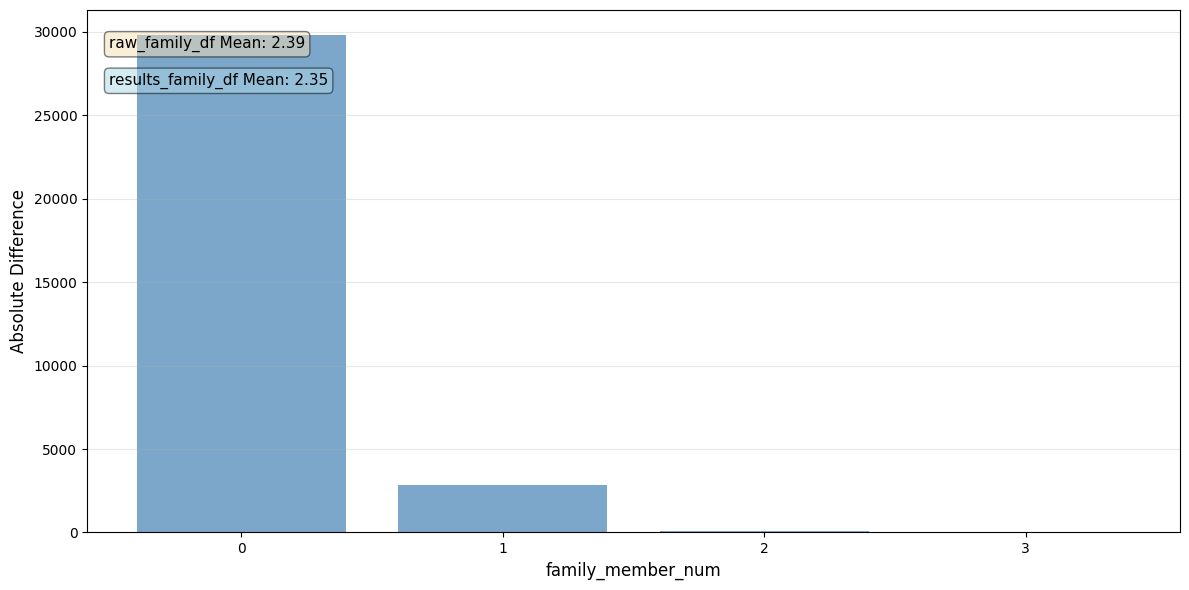

In [72]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算绝对差异
differences = abs(raw_family_df['family_家庭成员数量'] - results_family_df['family_家庭成员数量'])
print((differences==0).sum()/len(differences))
differences_stas = differences.value_counts()
# 计算两个数据源的均值
raw_mean = raw_family_df['family_家庭成员数量'].mean()
results_mean = results_family_df['family_家庭成员数量'].mean()

# 创建柱状图
plt.figure(figsize=(12, 6))
plt.bar(differences_stas.index, differences_stas.values, alpha=0.7, color='steelblue')
plt.xticks(differences_stas.index)
plt.xlabel('family_member_num', fontsize=12)
plt.ylabel('Absolute Difference', fontsize=12)
# plt.title('家庭成员数量绝对差异分布', fontsize=14, fontweight='bold')

# 在空白处添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

0.904541015625


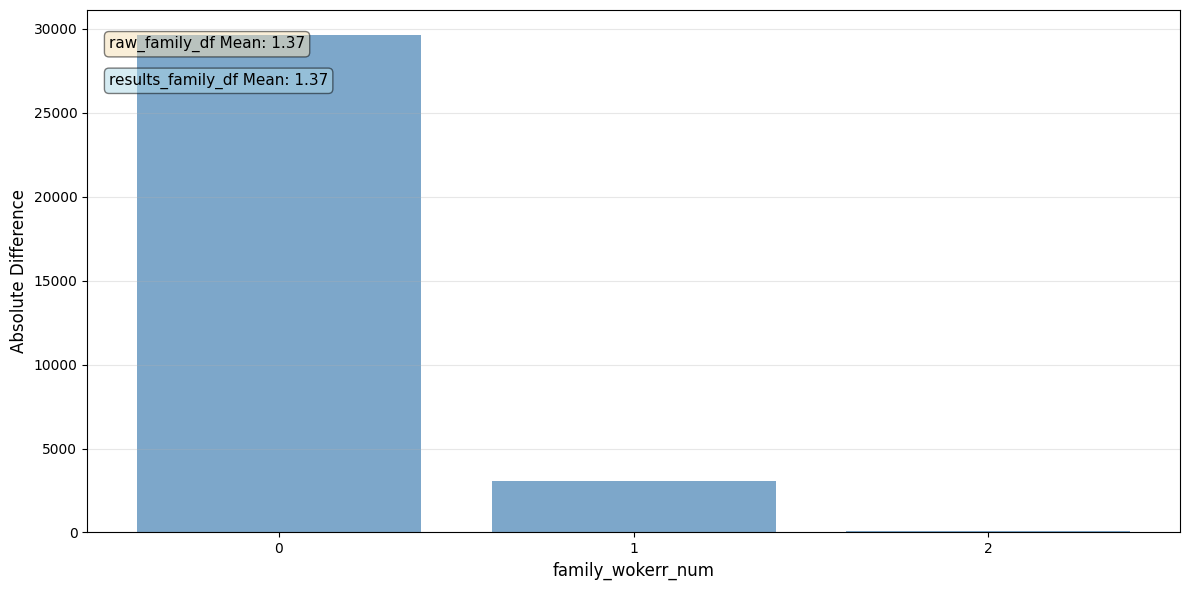

In [73]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算绝对差异
differences = abs(raw_family_df['family_家庭工作人口数'] - results_family_df['family_家庭工作人口数'])
print((differences==0).sum()/len(differences))
differences_stas = differences.value_counts()
# 计算两个数据源的均值
raw_mean = raw_family_df['family_家庭工作人口数'].mean()
results_mean = results_family_df['family_家庭工作人口数'].mean()

# 创建柱状图
plt.figure(figsize=(12, 6))
plt.bar(differences_stas.index, differences_stas.values, alpha=0.7, color='steelblue')
plt.xticks(differences_stas.index)
plt.xlabel('family_wokerr_num', fontsize=12)
plt.ylabel('Absolute Difference', fontsize=12)
# plt.title('家庭成员数量绝对差异分布', fontsize=14, fontweight='bold')

# 在空白处添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

0.970855712890625


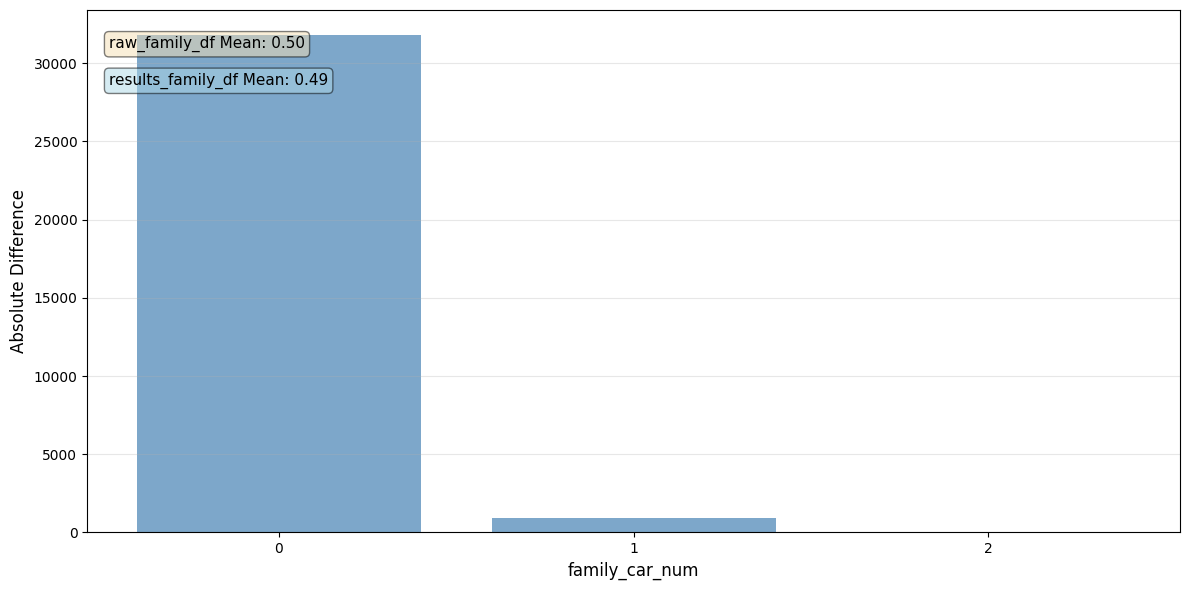

In [75]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算绝对差异
differences = abs(raw_family_df['family_机动车数量'] - results_family_df['family_机动车数量'])
print((differences==0).sum()/len(differences))
differences_stas = differences.value_counts()
# 计算两个数据源的均值
raw_mean = raw_family_df['family_机动车数量'].mean()
results_mean = results_family_df['family_机动车数量'].mean()

# 创建柱状图
plt.figure(figsize=(12, 6))
plt.bar(differences_stas.index, differences_stas.values, alpha=0.7, color='steelblue')
plt.xticks(differences_stas.index)
plt.xlabel('family_car_num', fontsize=12)
plt.ylabel('Absolute Difference', fontsize=12)
# plt.title('家庭成员数量绝对差异分布', fontsize=14, fontweight='bold')

# 在空白处添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

0.891510009765625


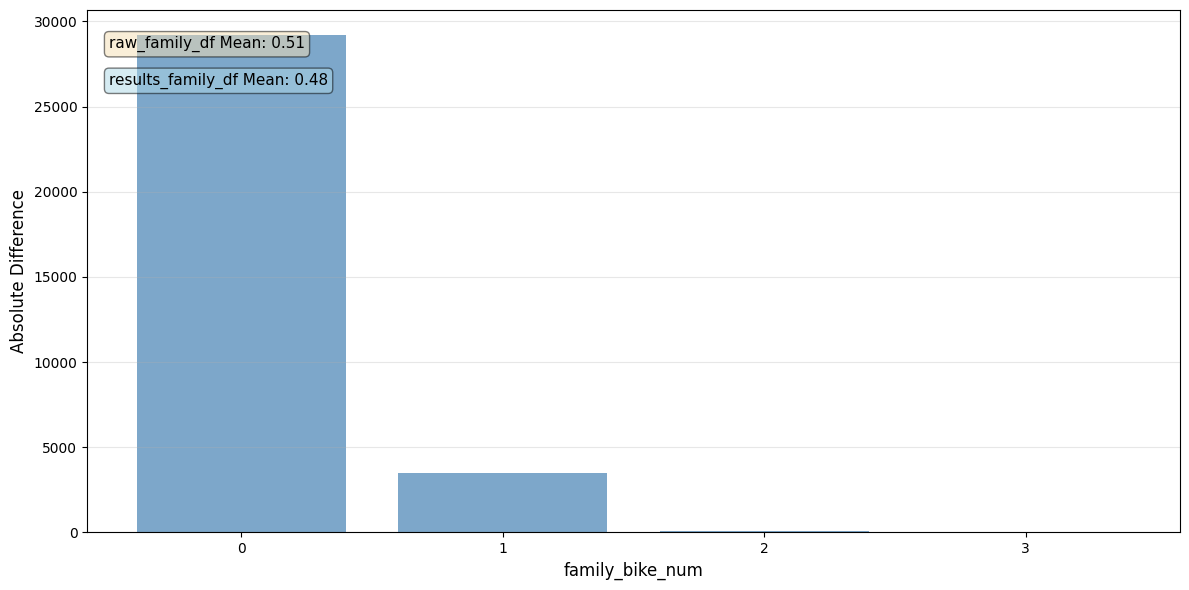

In [76]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算绝对差异
differences = abs(raw_family_df['family_脚踏自行车数量'] - results_family_df['family_脚踏自行车数量'])
print((differences==0).sum()/len(differences))
differences_stas = differences.value_counts()
# 计算两个数据源的均值
raw_mean = raw_family_df['family_脚踏自行车数量'].mean()
results_mean = results_family_df['family_脚踏自行车数量'].mean()

# 创建柱状图
plt.figure(figsize=(12, 6))
plt.bar(differences_stas.index, differences_stas.values, alpha=0.7, color='steelblue')
plt.xticks(differences_stas.index)
plt.xlabel('family_bike_num', fontsize=12)
plt.ylabel('Absolute Difference', fontsize=12)
# plt.title('家庭成员数量绝对差异分布', fontsize=14, fontweight='bold')

# 在空白处添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

0.915557861328125


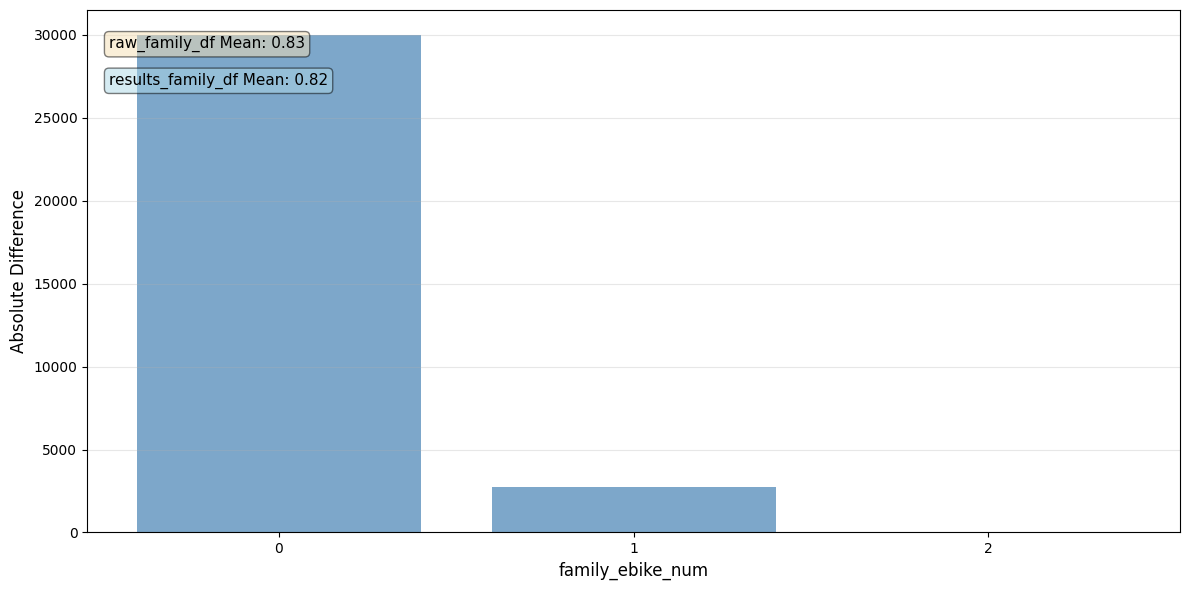

In [77]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算绝对差异
differences = abs(raw_family_df['family_电动自行车数量'] - results_family_df['family_电动自行车数量'])
print((differences==0).sum()/len(differences))
differences_stas = differences.value_counts()
# 计算两个数据源的均值
raw_mean = raw_family_df['family_电动自行车数量'].mean()
results_mean = results_family_df['family_电动自行车数量'].mean()

# 创建柱状图
plt.figure(figsize=(12, 6))
plt.bar(differences_stas.index, differences_stas.values, alpha=0.7, color='steelblue')
plt.xticks(differences_stas.index)
plt.xlabel('family_ebike_num', fontsize=12)
plt.ylabel('Absolute Difference', fontsize=12)
# plt.title('家庭成员数量绝对差异分布', fontsize=14, fontweight='bold')

# 在空白处添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

0.999908447265625


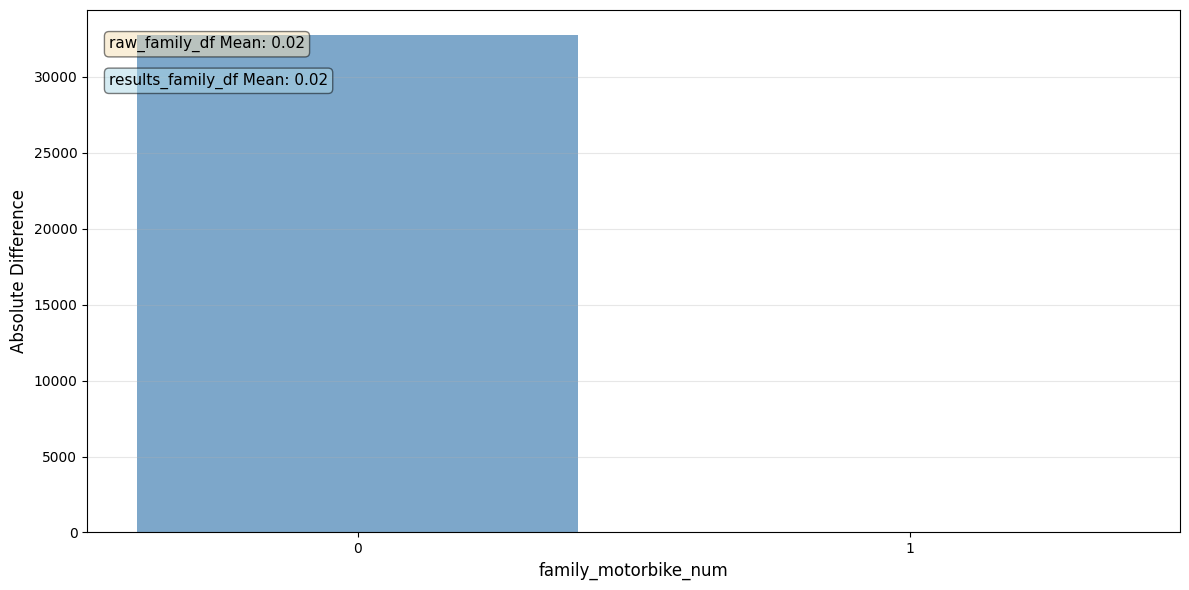

In [78]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算绝对差异
differences = abs(raw_family_df['family_摩托车数量'] - results_family_df['family_摩托车数量'])
print((differences==0).sum()/len(differences))
differences_stas = differences.value_counts()
# 计算两个数据源的均值
raw_mean = raw_family_df['family_摩托车数量'].mean()
results_mean = results_family_df['family_摩托车数量'].mean()

# 创建柱状图
plt.figure(figsize=(12, 6))
plt.bar(differences_stas.index, differences_stas.values, alpha=0.7, color='steelblue')
plt.xticks(differences_stas.index)
plt.xlabel('family_motorbike_num', fontsize=12)
plt.ylabel('Absolute Difference', fontsize=12)
# plt.title('家庭成员数量绝对差异分布', fontsize=14, fontweight='bold')

# 在空白处添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

0.997833251953125


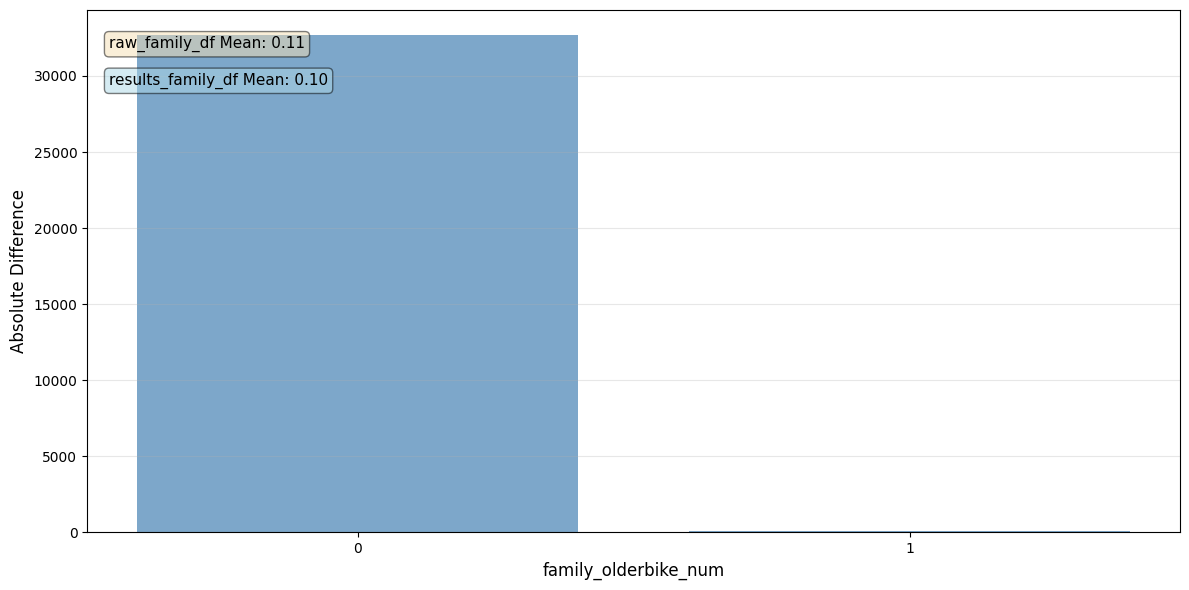

In [79]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算绝对差异
differences = abs(raw_family_df['family_老年代步车数量'] - results_family_df['family_老年代步车数量'])
print((differences==0).sum()/len(differences))
differences_stas = differences.value_counts()
# 计算两个数据源的均值
raw_mean = raw_family_df['family_老年代步车数量'].mean()
results_mean = results_family_df['family_老年代步车数量'].mean()

# 创建柱状图
plt.figure(figsize=(12, 6))
plt.bar(differences_stas.index, differences_stas.values, alpha=0.7, color='steelblue')
plt.xticks(differences_stas.index)
plt.xlabel('family_olderbike_num', fontsize=12)
plt.ylabel('Absolute Difference', fontsize=12)
# plt.title('家庭成员数量绝对差异分布', fontsize=14, fontweight='bold')

# 在空白处添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

0.79107666015625


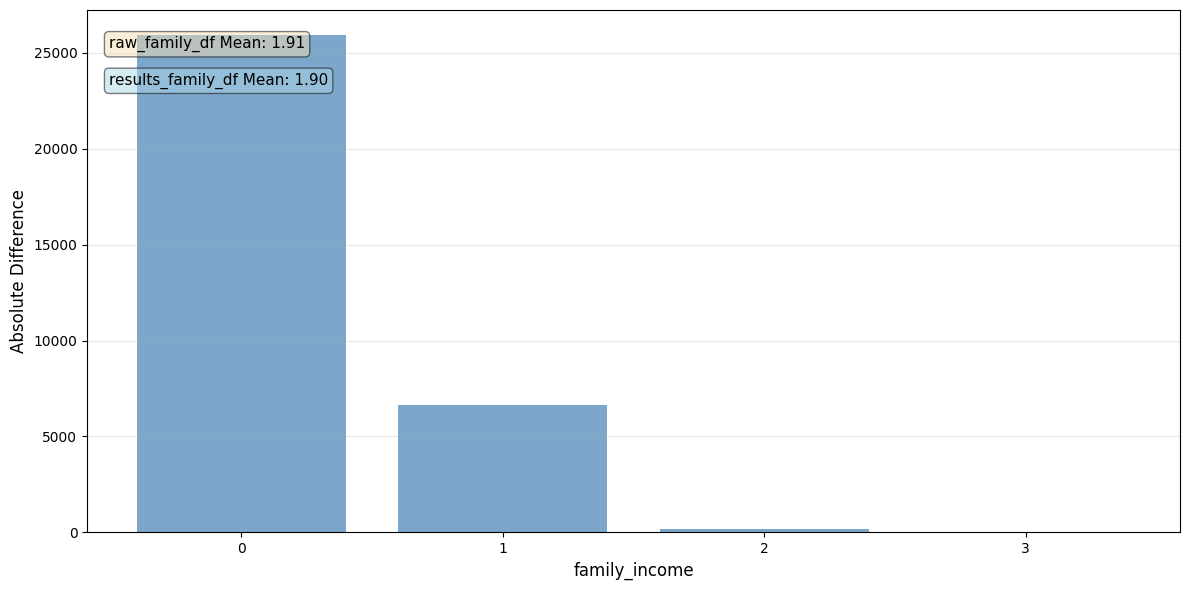

In [80]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算绝对差异
differences = abs(raw_family_df['family_家庭年收入'] - results_family_df['family_家庭年收入'])
print((differences==0).sum()/len(differences))
differences_stas = differences.value_counts()
# 计算两个数据源的均值
raw_mean = raw_family_df['family_家庭年收入'].mean()
results_mean = results_family_df['family_家庭年收入'].mean()

# 创建柱状图
plt.figure(figsize=(12, 6))
plt.bar(differences_stas.index, differences_stas.values, alpha=0.7, color='steelblue')
plt.xticks(differences_stas.index)
plt.xlabel('family_income', fontsize=12)
plt.ylabel('Absolute Difference', fontsize=12)
# plt.title('家庭成员数量绝对差异分布', fontsize=14, fontweight='bold')

# 在空白处添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [97]:
(raw_family_df['have_student'] == results_family_df['have_student']).sum()/len(raw_family_df)

0.99066162109375

### 个人的

0.5019866365157845


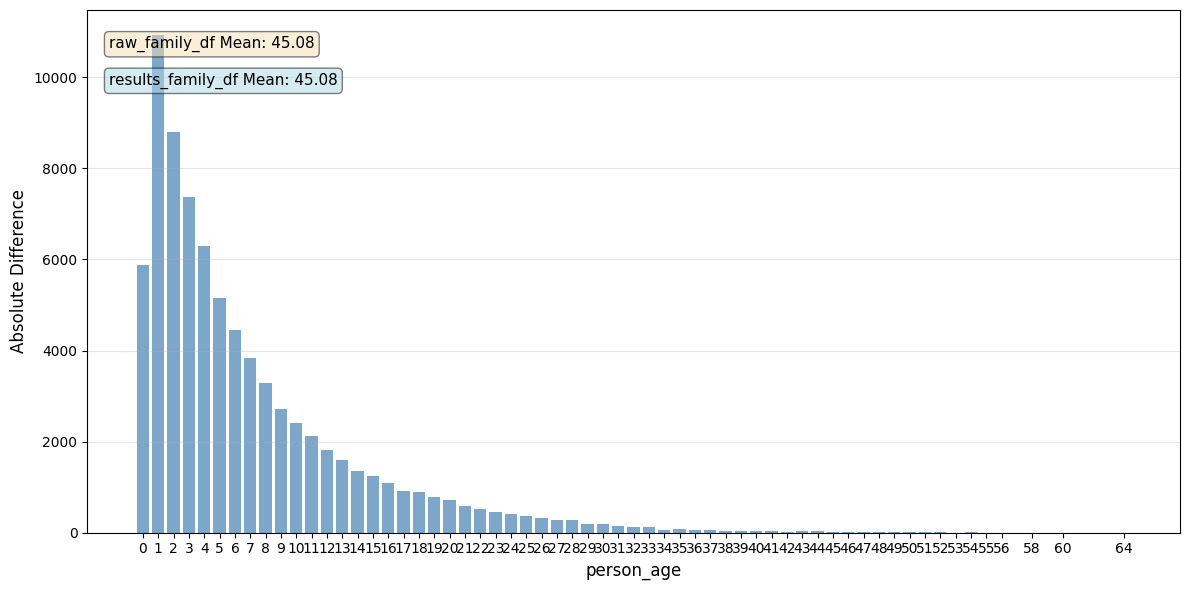

In [81]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算绝对差异
differences = abs(raw_person_df['age'] - results_person_df['age'])
print((differences<5).sum()/len(differences))
differences_stas = differences.value_counts()
# 计算两个数据源的均值
raw_mean = raw_person_df['age'].mean()
results_mean = results_person_df['age'].mean()

# 创建柱状图
plt.figure(figsize=(12, 6))
plt.bar(differences_stas.index, differences_stas.values, alpha=0.7, color='steelblue')
plt.xticks(differences_stas.index)
plt.xlabel('person_age', fontsize=12)
plt.ylabel('Absolute Difference', fontsize=12)
# plt.title('家庭成员数量绝对差异分布', fontsize=14, fontweight='bold')

# 在空白处添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [82]:
(raw_person_df['gender'] == results_person_df['gender']).sum()/len(raw_person_df)

0.7944629693508617

In [83]:
(raw_person_df['license'] == results_person_df['license']).sum()/len(raw_person_df)

0.83422125126161

In [84]:
(raw_person_df['relation'] == results_person_df['relation']).sum()/len(raw_person_df)

0.7119696447050707

In [85]:
(raw_person_df['education'] == results_person_df['education']).sum()/len(raw_person_df)

0.6127528010936083

In [86]:
(raw_person_df['occupation'] == results_person_df['occupation']).sum()/len(raw_person_df)

0.6419966016378572

## 精度比较2： 分布比较

### 家庭的

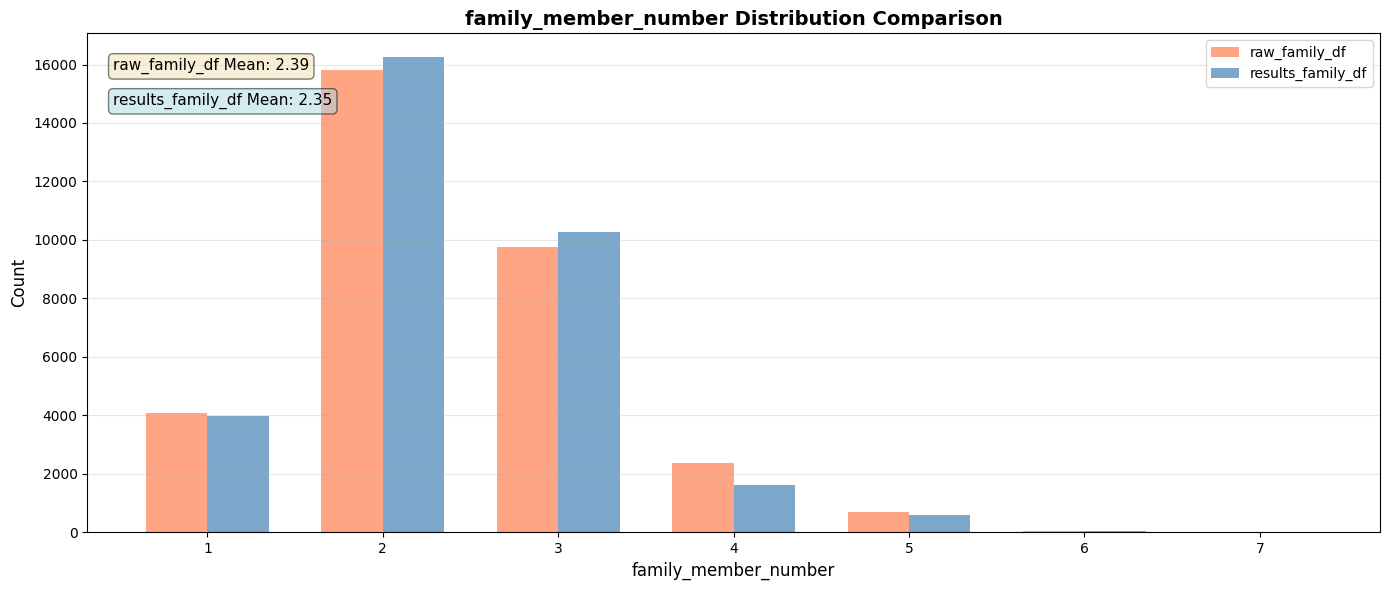

In [87]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_家庭成员数量'].value_counts().sort_index()
results_age_counts = results_family_df['family_家庭成员数量'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_家庭成员数量'].mean()
results_mean = results_family_df['family_家庭成员数量'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_member_number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_member_number Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

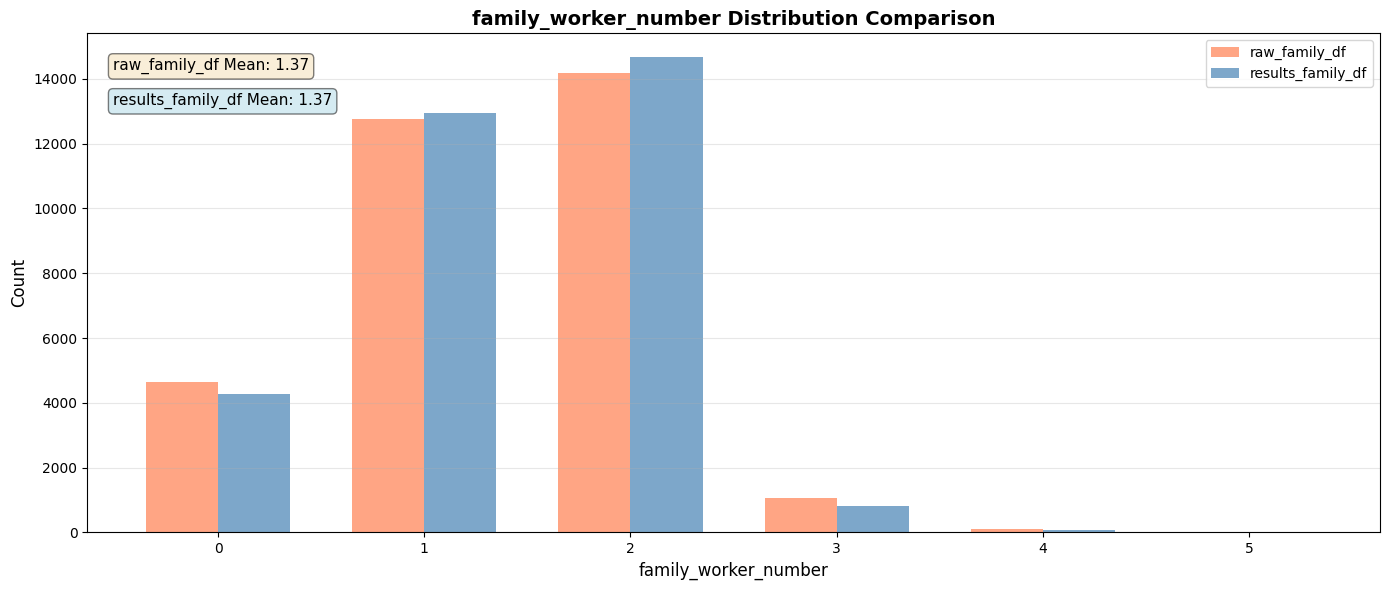

In [88]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_家庭工作人口数'].value_counts().sort_index()
results_age_counts = results_family_df['family_家庭工作人口数'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_家庭工作人口数'].mean()
results_mean = results_family_df['family_家庭工作人口数'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_worker_number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_worker_number Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

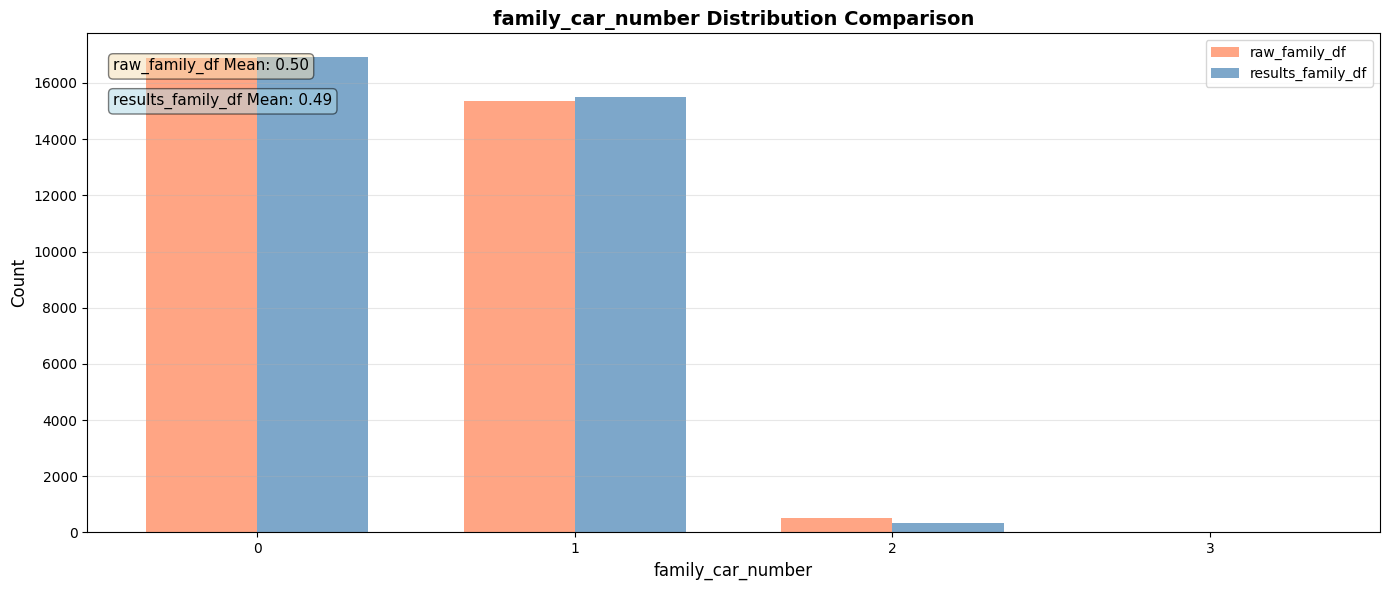

In [89]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_机动车数量'].value_counts().sort_index()
results_age_counts = results_family_df['family_机动车数量'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_机动车数量'].mean()
results_mean = results_family_df['family_机动车数量'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_car_number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_car_number Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

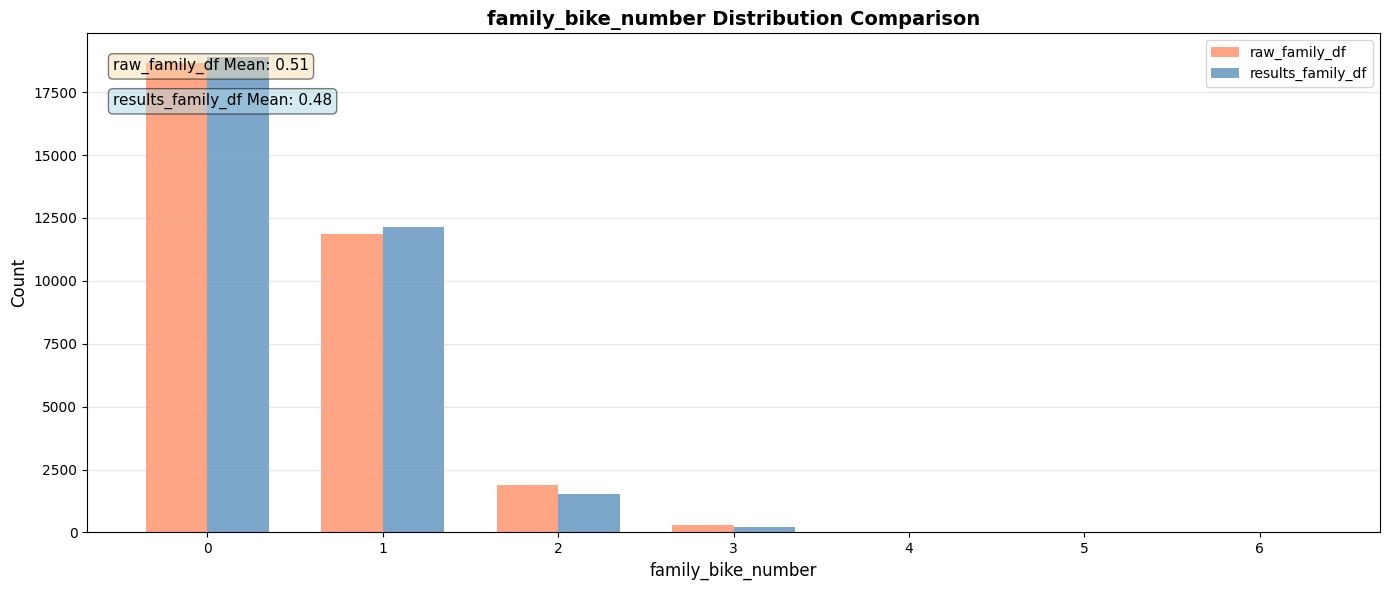

In [90]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_脚踏自行车数量'].value_counts().sort_index()
results_age_counts = results_family_df['family_脚踏自行车数量'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_脚踏自行车数量'].mean()
results_mean = results_family_df['family_脚踏自行车数量'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_bike_number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_bike_number Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

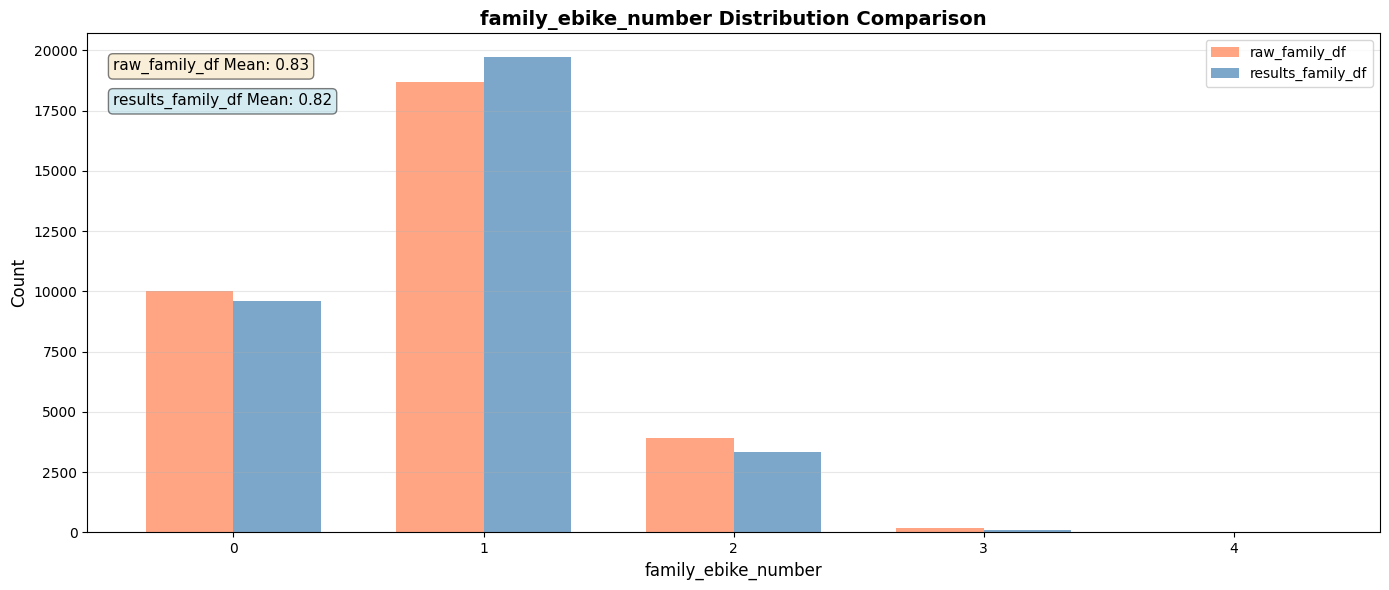

In [91]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_电动自行车数量'].value_counts().sort_index()
results_age_counts = results_family_df['family_电动自行车数量'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_电动自行车数量'].mean()
results_mean = results_family_df['family_电动自行车数量'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_ebike_number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_ebike_number Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

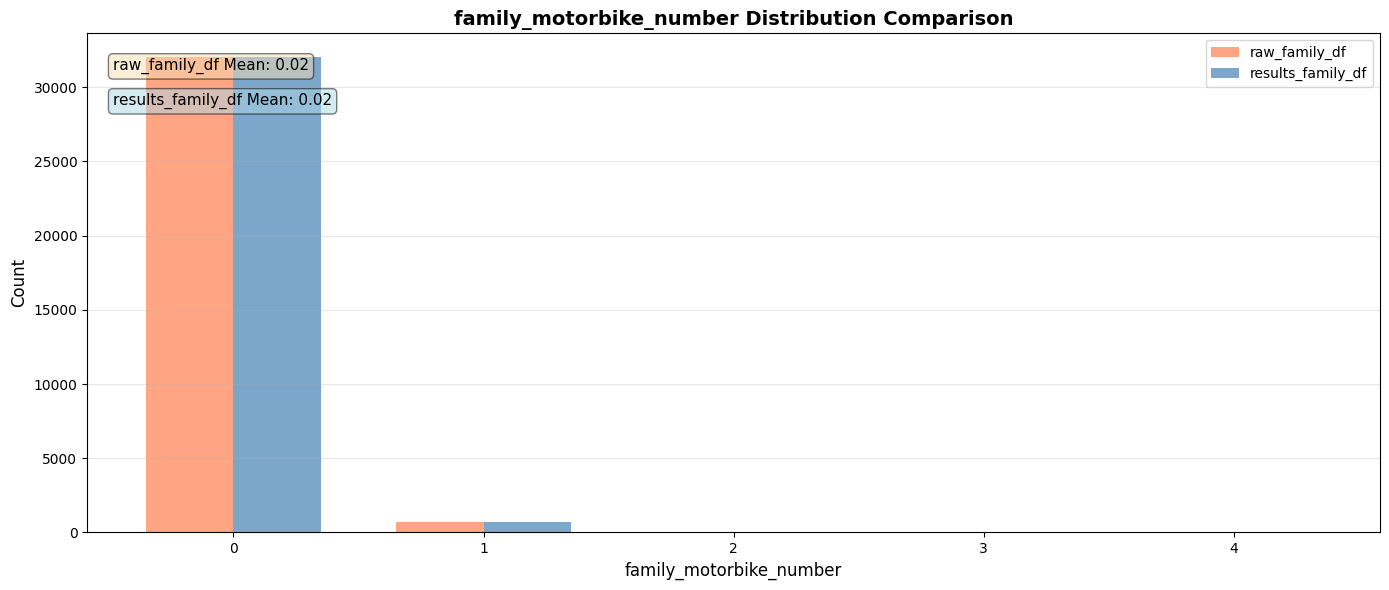

In [92]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_摩托车数量'].value_counts().sort_index()
results_age_counts = results_family_df['family_摩托车数量'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_摩托车数量'].mean()
results_mean = results_family_df['family_摩托车数量'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_motorbike_number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_motorbike_number Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

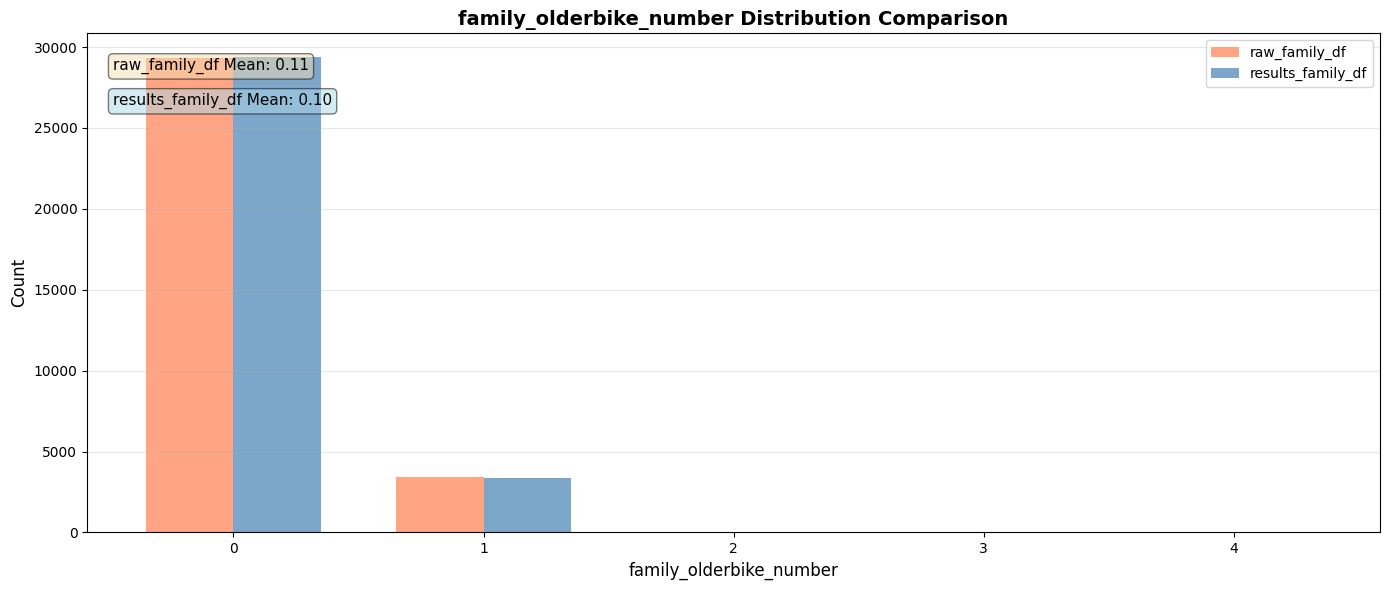

In [93]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_老年代步车数量'].value_counts().sort_index()
results_age_counts = results_family_df['family_老年代步车数量'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_老年代步车数量'].mean()
results_mean = results_family_df['family_老年代步车数量'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_olderbike_number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_olderbike_number Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

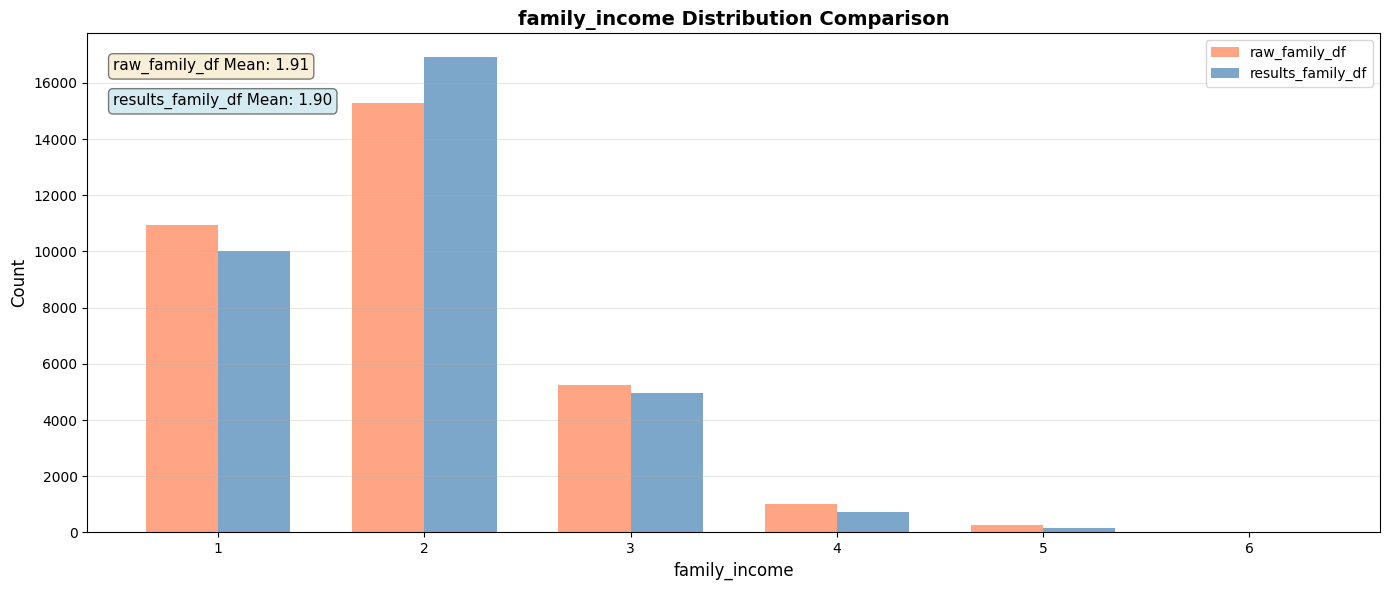

In [94]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_家庭年收入'].value_counts().sort_index()
results_age_counts = results_family_df['family_家庭年收入'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_家庭年收入'].mean()
results_mean = results_family_df['family_家庭年收入'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_income', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_income Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

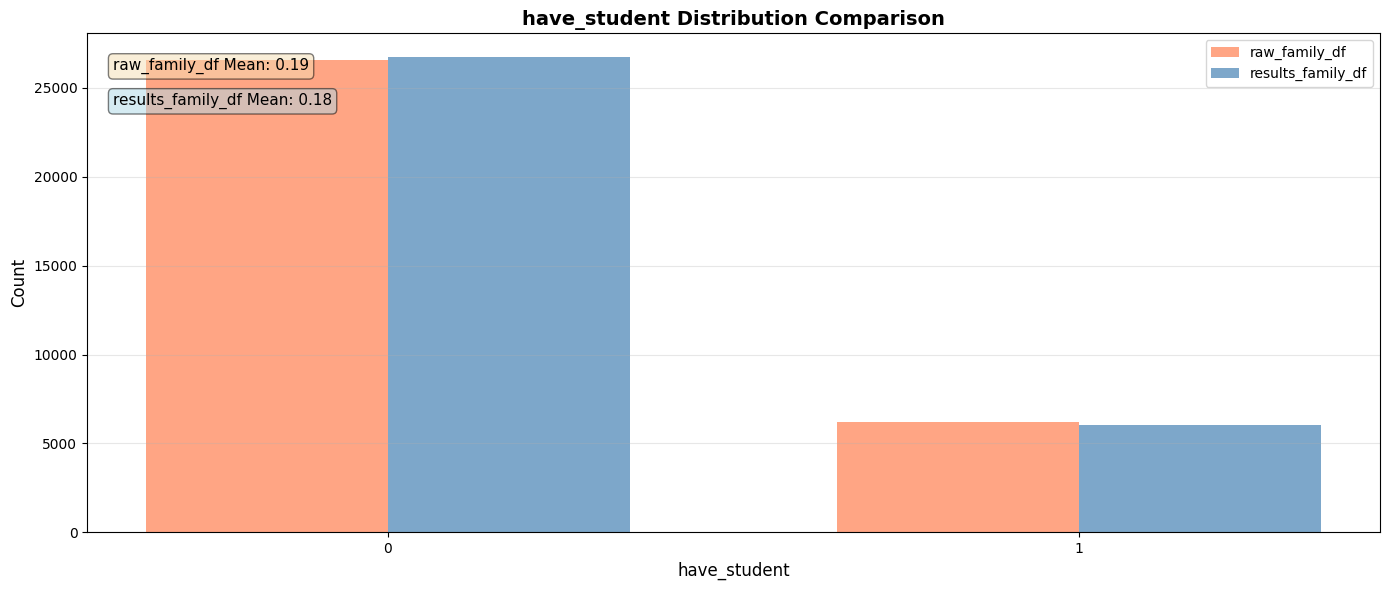

In [95]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['have_student'].value_counts().sort_index()
results_age_counts = results_family_df['have_student'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['have_student'].mean()
results_mean = results_family_df['have_student'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('have_student', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('have_student Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 个人的

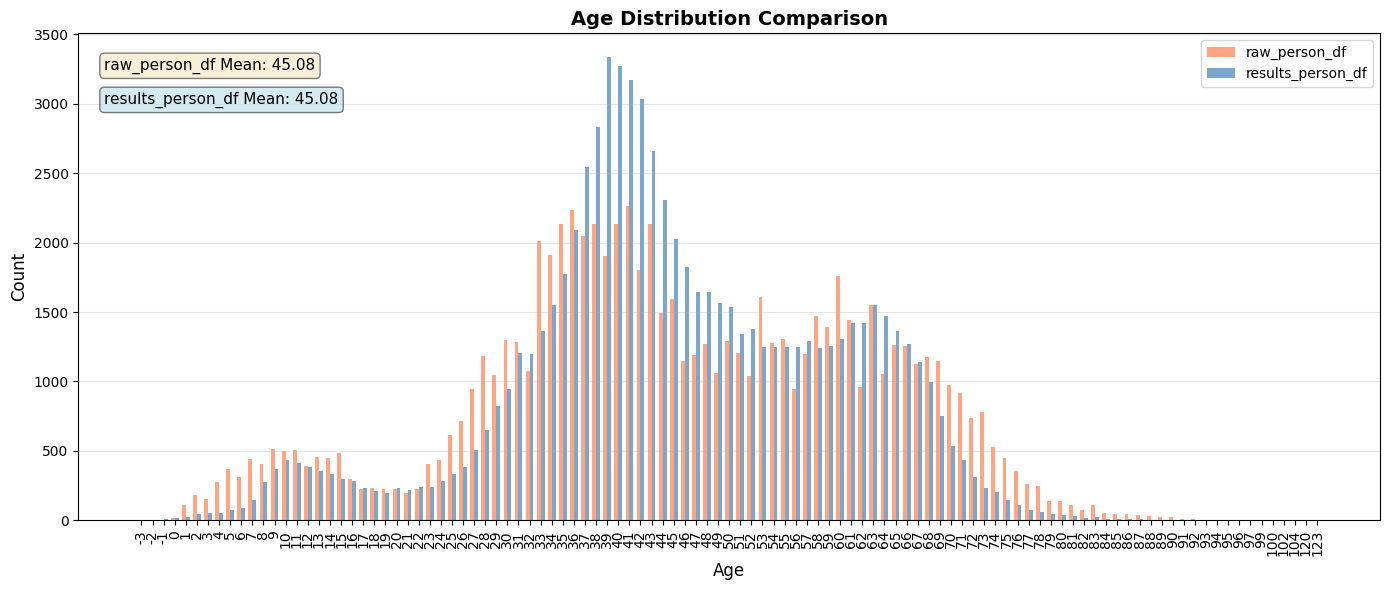

In [96]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_person_df['age'].value_counts().sort_index()
results_age_counts = results_person_df['age'].value_counts().sort_index()

# 计算均值
raw_mean = raw_person_df['age'].mean()
results_mean = results_person_df['age'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_person_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_person_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Age Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_person_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_person_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

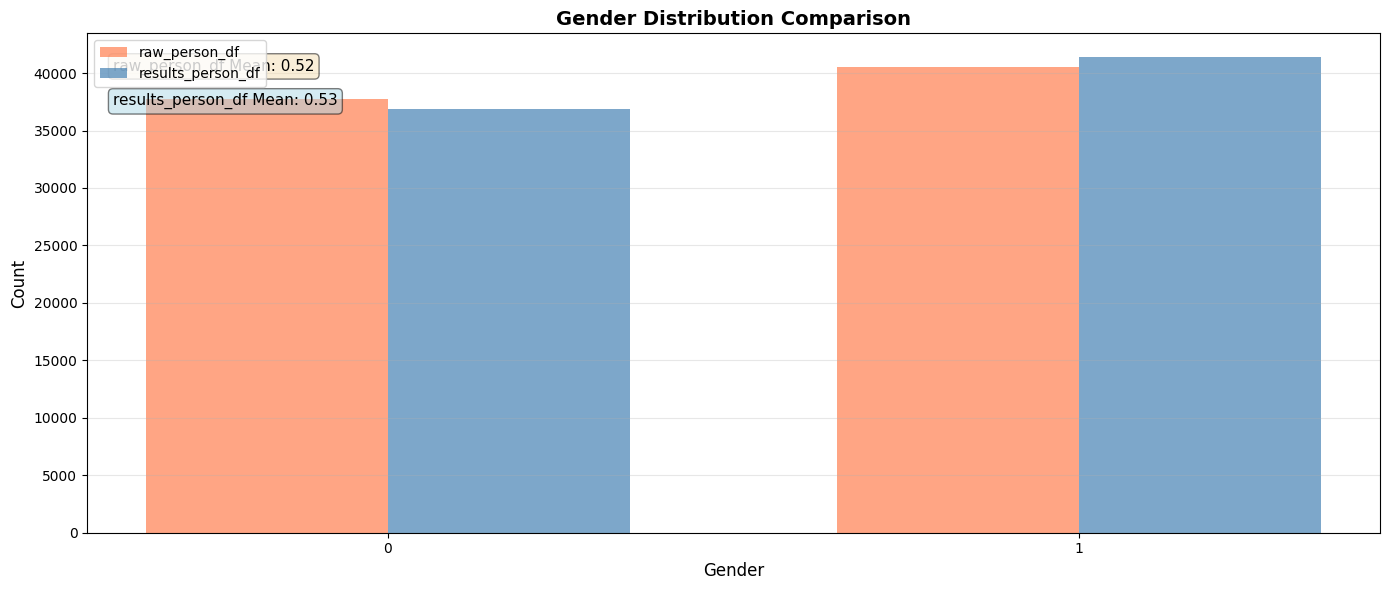

In [97]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_person_df['gender'].value_counts().sort_index()
results_age_counts = results_person_df['gender'].value_counts().sort_index()

# 计算均值
raw_mean = raw_person_df['gender'].mean()
results_mean = results_person_df['gender'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_person_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_person_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Gender Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_person_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_person_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

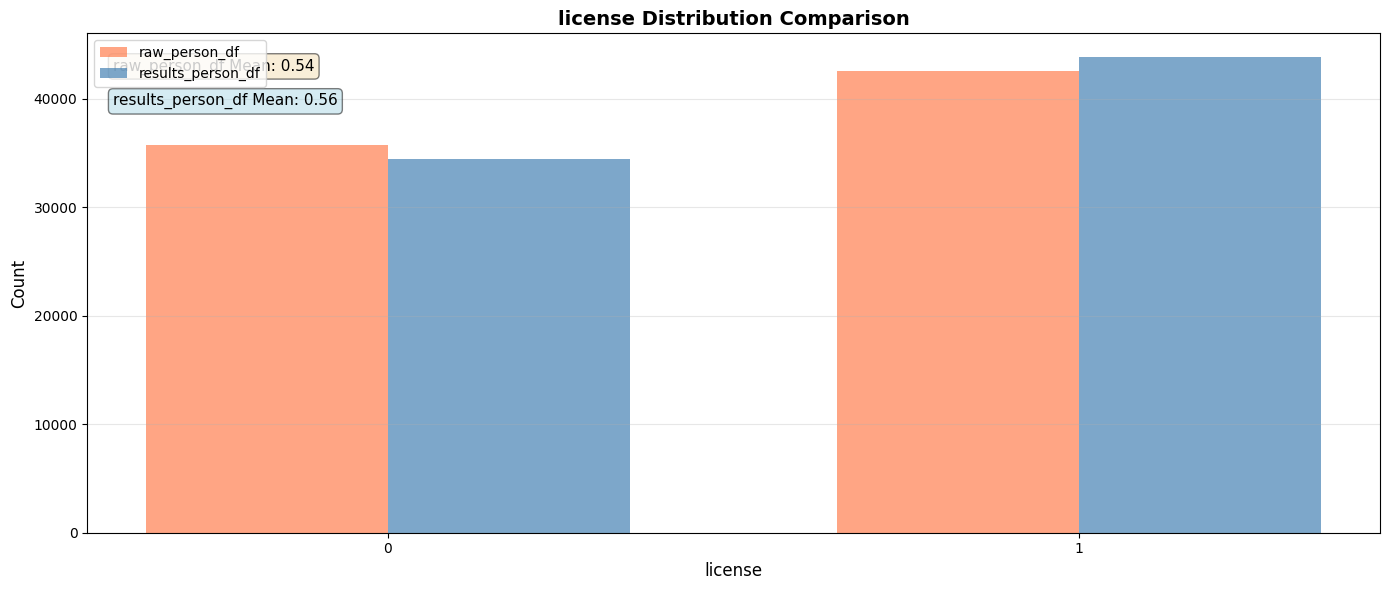

In [98]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_person_df['license'].value_counts().sort_index()
results_age_counts = results_person_df['license'].value_counts().sort_index()

# 计算均值
raw_mean = raw_person_df['license'].mean()
results_mean = results_person_df['license'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_person_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_person_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('license', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('license Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_person_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_person_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

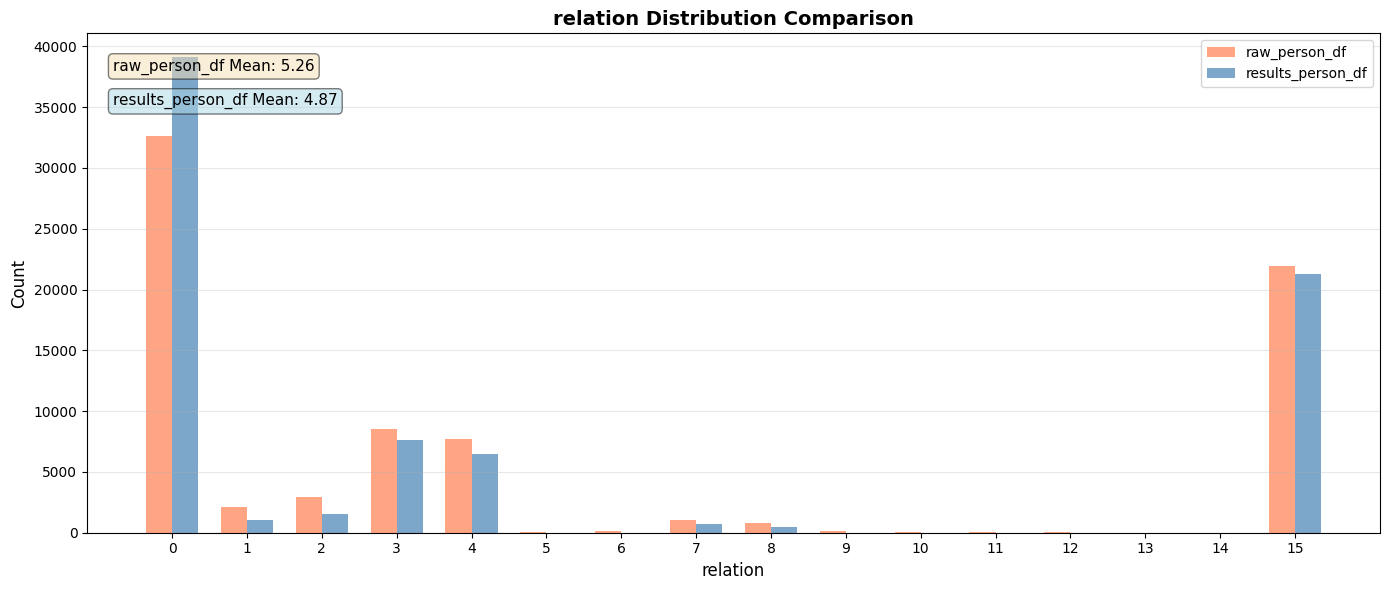

In [99]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_person_df['relation'].value_counts().sort_index()
results_age_counts = results_person_df['relation'].value_counts().sort_index()

# 计算均值
raw_mean = raw_person_df['relation'].mean()
results_mean = results_person_df['relation'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_person_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_person_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('relation', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('relation Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_person_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_person_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

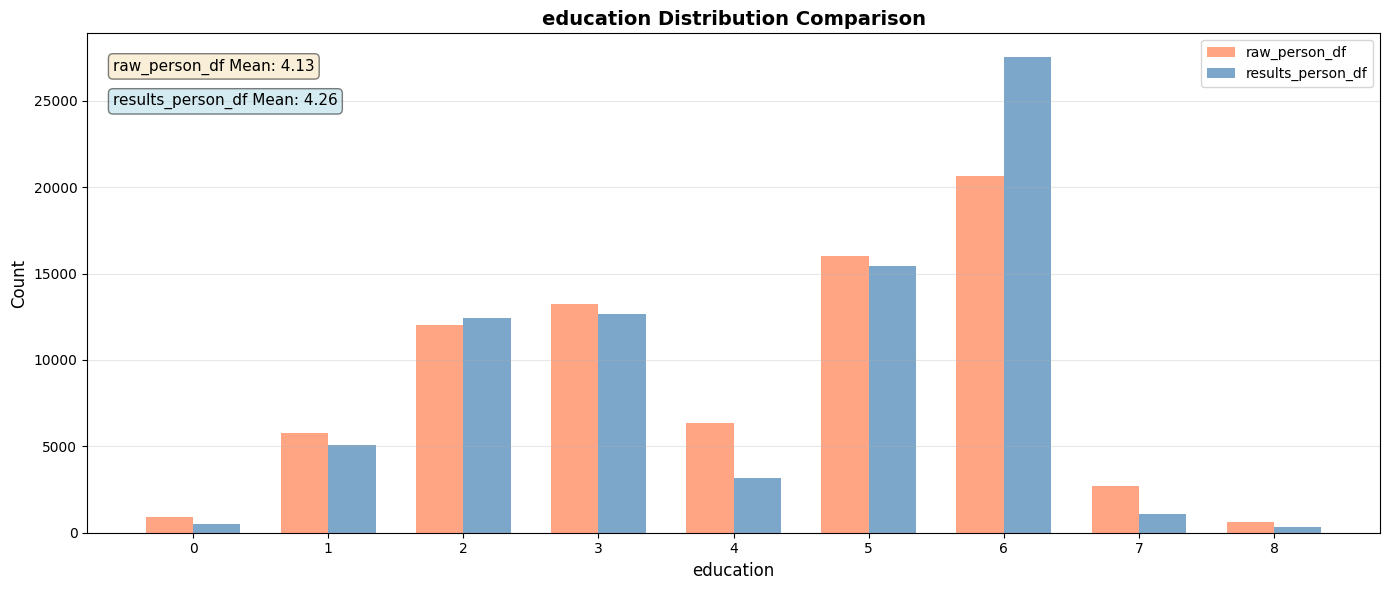

In [100]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_person_df['education'].value_counts().sort_index()
results_age_counts = results_person_df['education'].value_counts().sort_index()

# 计算均值
raw_mean = raw_person_df['education'].mean()
results_mean = results_person_df['education'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_person_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_person_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('education', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('education Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_person_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_person_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

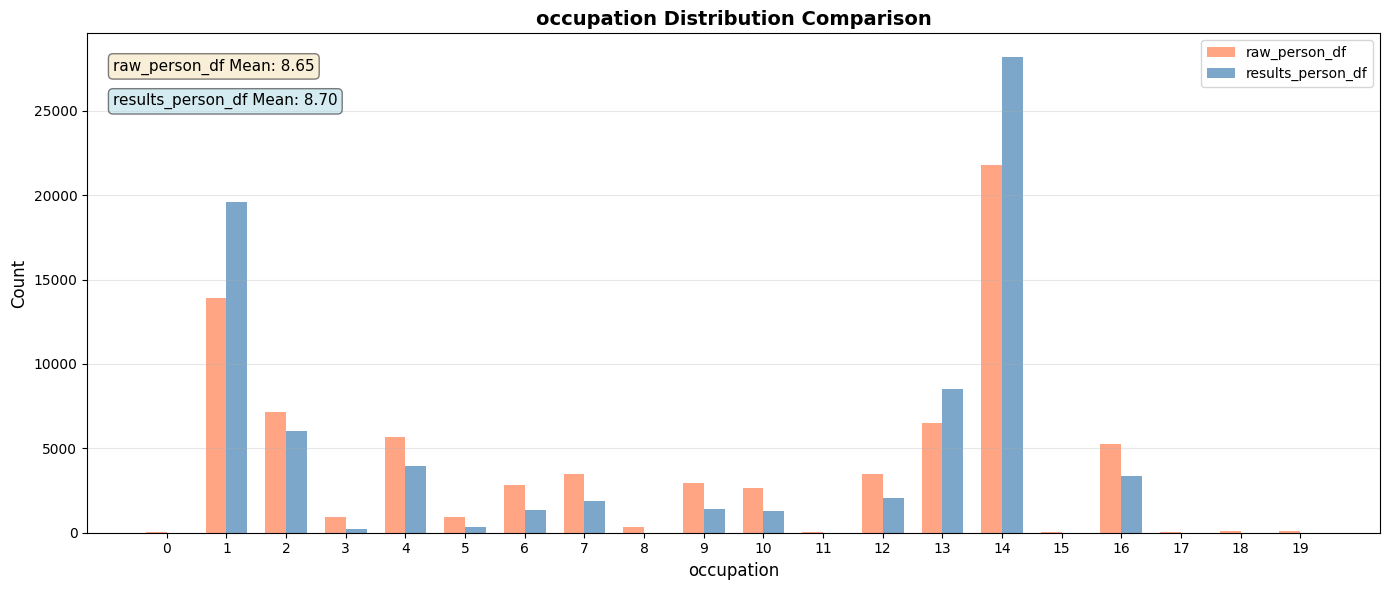

In [101]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_person_df['occupation'].value_counts().sort_index()
results_age_counts = results_person_df['occupation'].value_counts().sort_index()

# 计算均值
raw_mean = raw_person_df['occupation'].mean()
results_mean = results_person_df['occupation'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_person_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_person_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('occupation', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('occupation Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_person_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_person_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 扩散模型去噪生成

## 数据生成

In [30]:
from population_DiT_cluster8_memberbundle import *
import torch
torch.backends.cuda.matmul.allow_tf32 = True
torch.backends.cudnn.allow_tf32 = True

import argparse
import logging
import os
import numpy as np
import sys
from collections import OrderedDict
from copy import deepcopy
from glob import glob
from time import time
from tqdm import tqdm

sys.path.append('DiT-main')
# Now import DiTBlock from models
from models import DiTBlock, DiTBlockPerson
from diffusion import create_diffusion, create_diffusion_family

from losses_personmask_memberbundle4 import compute_total_loss
from dataset import load_population_data, create_dataloader

cluster_info = torch.from_numpy(family2023['cluster'].values.astype(int))

# 加载模型
model_result = load_population_dit_checkpoint("results/012-PopulationDiT-1025-修改了噪声机制/checkpoints/final.pt")
args = model_result['args']
model = model_result['model']
model.eval() 
diffusion = create_diffusion_family('200', predict_xstart=True, learn_sigma=False)
class_labels = cluster_info[:1000]  # 假设我们有1000个家庭样本
family_features = 10  # 假设每个家庭成员有10个特征
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
max_nodes = 8  # 假设每个家庭最多有8个成员
person_features = 51

n = len(class_labels)
z = torch.randn(n, 10, device=device)
y = class_labels.clone().detach().to(device)

# Setup classifier-free guidance:
z_family = torch.cat([z, z], 0)
y_null = torch.tensor([0] * n, device=device)
y = torch.cat([y, y_null], 0)

model_kwargs = dict(cluster=y)

# Sample images:
samples = diffusion.p_sample_loop(
    model.reference_family, z_family.shape, z_family, clip_denoised=False, model_kwargs=model_kwargs, progress=True, device=device
)

samples, _ = samples.chunk(2, dim=0)

Loading checkpoint from results/012-PopulationDiT-1025-修改了噪声机制/checkpoints/final.pt
Model parameters:
  - Hidden size: 128
  - Depth: 3
  - Num heads: 8
  - Max family size: 8


RuntimeError: Error(s) in loading state_dict for PopulationDiT:
	Missing key(s) in state_dict: "person_blocks.0.attn.in_proj_weight", "person_blocks.0.attn.in_proj_bias", "person_blocks.0.attn.out_proj.weight", "person_blocks.0.attn.out_proj.bias", "person_blocks.1.attn.in_proj_weight", "person_blocks.1.attn.in_proj_bias", "person_blocks.1.attn.out_proj.weight", "person_blocks.1.attn.out_proj.bias", "person_blocks.2.attn.in_proj_weight", "person_blocks.2.attn.in_proj_bias", "person_blocks.2.attn.out_proj.weight", "person_blocks.2.attn.out_proj.bias". 
	Unexpected key(s) in state_dict: "person_blocks.0.attn.qkv.weight", "person_blocks.0.attn.qkv.bias", "person_blocks.0.attn.proj.weight", "person_blocks.0.attn.proj.bias", "person_blocks.1.attn.qkv.weight", "person_blocks.1.attn.qkv.bias", "person_blocks.1.attn.proj.weight", "person_blocks.1.attn.proj.bias", "person_blocks.2.attn.qkv.weight", "person_blocks.2.attn.qkv.bias", "person_blocks.2.attn.proj.weight", "person_blocks.2.attn.proj.bias". 

In [129]:
diffusion_person = create_diffusion_family('75', diffusion_steps = 300, predict_xstart=True, learn_sigma=False)
family_features = 10  # 假设每个家庭成员有10个特征
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
max_nodes = 8  # 假设每个家庭最多有8个成员
person_features = 51

z_person = torch.randn(n, max_nodes, person_features, device=device)

# Setup classifier-free guidance:
z_person = torch.cat([z_person, z_person], 0)
y_null = torch.tensor([0] * n, device=device)
family_feature = torch.cat([samples, samples], 0)

model_kwargs_person = dict(family_feature= family_feature, family_cluster=y, person_mask=None)

# Sample images:
samples_person = diffusion_person.p_sample_loop(
    model.reference_person, z_person.shape, z_person, clip_denoised=False, model_kwargs=model_kwargs_person, progress=True, device=device
)

samples_person, _ = samples_person.chunk(2, dim=0)

  0%|          | 0/75 [00:00<?, ?it/s]/mnt/d/OneDrive/Python scripts for big data/2025_05博士论文第一章-合成人口/GraphVAE-master/graph_vae/graph_datastructure.py:592: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525541702/work/aten/src/ATen/native/IndexingUtils.h:27.)
  adj_mat[msk.triu()] = adj_mat_logits.contiguous().view(-1)
/mnt/d/OneDrive/Python scripts for big data/2025_05博士论文第一章-合成人口/GraphVAE-master/graph_vae/graph_datastructure.py:594: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525541702/work/aten/src/ATen/native/IndexingUtils.h:27.)
  edge_attribute_tensor[msk[:, None, :, :].triu(diagonal=1).repeat(1,CHEM_DETAILS.num_bond_types, 1,1)] = edge_atr_logits.contiguous().view(-1)
100%|██████████| 75/75 [00:24<00:00,  3.09it/s]


In [130]:
samples.cpu().numpy()

array([[ 6.8994850e-01,  8.0383360e-01,  9.3027794e-01, ...,
         2.3042952e-01,  9.9997616e-01,  2.3868317e-05],
       [-4.3305701e-01,  8.3562779e-01,  9.3094879e-01, ...,
        -3.5428920e-01,  9.9998343e-01,  1.6534670e-05],
       [-4.3680024e-01,  8.1557894e-01,  9.0956444e-01, ...,
         3.0867580e-01,  9.9997663e-01,  2.3368133e-05],
       ...,
       [-1.5187980e+00, -1.6895869e+00, -7.5642848e-01, ...,
        -1.5884928e-01,  9.9998605e-01,  1.3934306e-05],
       [-4.2595199e-01,  8.4163117e-01, -9.4580430e-01, ...,
        -8.7888163e-01,  9.9998224e-01,  1.7760693e-05],
       [ 1.9217161e+00,  2.8002365e+00,  4.0197434e+00, ...,
         1.7989308e+00,  9.9683678e-01,  3.1631361e-03]], dtype=float32)

In [131]:
samples_person

tensor([[[ 2.3417e-02,  5.1405e-05,  9.9995e-01,  ...,  1.3084e-11,
           1.1597e-11,  9.9898e-01],
         [-9.5119e-01,  9.9997e-01,  2.7131e-05,  ...,  6.4616e-12,
           1.1699e-11,  9.9819e-01],
         [-1.0492e+00,  9.9999e-01,  5.5415e-06,  ...,  3.1461e-10,
           5.2132e-10,  9.9923e-01],
         ...,
         [ 1.0482e-01,  3.7451e-05,  9.9996e-01,  ...,  4.1015e-11,
           1.1561e-10,  9.9916e-01],
         [-2.3414e-02,  1.3380e-05,  9.9999e-01,  ...,  5.9467e-11,
           1.0117e-10,  9.9857e-01],
         [ 3.2292e-01,  2.5365e-05,  9.9997e-01,  ...,  1.1433e-07,
           2.2137e-07,  9.9723e-01]],

        [[-2.4072e-01,  5.6328e-06,  9.9999e-01,  ...,  3.2074e-11,
           3.9079e-11,  9.9940e-01],
         [-2.1501e-02,  4.5716e-06,  1.0000e+00,  ...,  5.1249e-11,
           5.4588e-11,  9.9936e-01],
         [ 5.4699e-02,  2.0475e-02,  9.7953e-01,  ...,  9.9754e-06,
           1.4022e-05,  6.3251e-02],
         ...,
         [-8.3567e-02,  9

In [132]:
results_family_df = pd.DataFrame(samples.cpu().numpy())
results_person_df = pd.DataFrame(samples_person.cpu().numpy().reshape(-1,51))

results_family_df['have_student'] = results_family_df[[8,9]].values.argmax(axis=1)

results_family_df = results_family_df[[0,1,2,3,4,5,6,7,'have_student']]
results_family_df.columns = ['family_家庭成员数量','family_家庭工作人口数','family_机动车数量','family_脚踏自行车数量','family_电动自行车数量','family_摩托车数量','family_老年代步车数量','income','have_student']


In [133]:
results_family_df.rename(columns = {'income' : 'family_家庭年收入'}, inplace=True)
decode_results_family = test.decode_family_continuous(results_family_df)
for col in decode_results_family.keys():
    results_family_df[f'family_{col}'] = decode_results_family[col]

In [134]:
results_family_df

,family_家庭成员数量,family_家庭工作人口数,family_机动车数量,family_脚踏自行车数量,family_电动自行车数量,family_摩托车数量,family_老年代步车数量,family_家庭年收入,have_student
0,3,2,1,0,1,0,0,2,0
1,2,2,1,0,0,0,0,2,0
2,2,2,1,0,1,0,0,2,0
3,3,1,1,1,4,0,0,2,1
4,2,2,1,0,2,0,0,2,0
...,...,...,...,...,...,...,...,...,...
995,2,1,1,0,0,0,0,2,0
996,2,1,1,1,0,0,0,3,0
997,1,0,0,0,3,0,0,2,0
998,2,2,0,1,1,0,0,1,0


In [140]:
real_person_ls = []
for i in results_family_df['family_家庭成员数量'].values:
    member_num = int(results_family_df.loc[i,'family_家庭成员数量'])
    real_person_ls.append(results_person_df.iloc[i*8: i*8 + member_num, :])

In [142]:
results_person_df = pd.concat(real_person_ls, ignore_index=True)

In [144]:
results_person_df['gender'] = results_person_df[[1,2]].values.argmax(axis=1)
results_person_df['license'] = results_person_df[[3,4]].values.argmax(axis=1)
results_person_df['relation'] = results_person_df.iloc[:,5:21].values.argmax(axis=1)
results_person_df['education'] = results_person_df.iloc[:,21:30].values.argmax(axis=1)
results_person_df['occupation'] = results_person_df.iloc[:,30:50].values.argmax(axis=1)


results_person_df = results_person_df[[0,'gender','license','relation','education','occupation',50]]
results_person_df.columns = ['age','gender','license','relation','education','occupation','label']


results_person_df['age'] = test.decode_person_continuous(results_person_df['age'])['age_actual']


/tmp/ipykernel_2392728/1689971133.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_person_df['age'] = test.decode_person_continuous(results_person_df['age'])['age_actual']


In [146]:
family2023[:1000]

,编号,家庭编号,所属城区,所属街道,所属社区,添加地址,家庭具体地址,小区编号,小区编号的环路代码,家庭流动人口数,家庭工作人口数,家庭学生人口数,家庭无业人口数,地址经度,地址纬度,调查员编号,调查员姓名,第1次入户时间,第1次敲门状态,第2次入户时间,第2次敲门状态,出行日期,家庭成员数量,住房类型,住房类型其他,住房类型_final,建筑面积,在北京是否更换过居住地址,本户居住起始年份,上一居住地址,上一居住地址经度,上一居住地址纬度,上一居住小区编码,家庭年收入,取快递次数,取外卖次数,脚踏自行车数量,电动自行车数量,摩托车数量,老年代步车数量,机动车数量,状态,成员信息登记状态,成员信息创建时间,成员信息更新时间,车辆信息登记状态,车辆信息创建时间,车辆信息更新时间,住房信息登记状态,住房信息创建时间,住房信息更新时间,出行信息登记状态,行程信息创建时间,出行信息更新时间,调查时的所在位置经度,调查时的所在位置纬度,调查时的所在位置定位时间,创建时间,修改时间,年度,项目名称,type,no.na,家庭成员数量_real,have_student,cluster
0,000b2a2b-1333-4d28-8056-8ab1a30870ad,010703000170,2,月坛街道,月坛社区,月坛西街东里21号院16,月坛西街东里21号院1号楼905,010703,3,0,2,0,0,116.349759,39.916528,e4decdee-2b98-4231-b1be-80537da8f151,郭建立,2023/5/15 0:00:00,success,2023/5/18 0:00:00,success,2023/5/16 0:00:00,3,1,-1,1,43.5,0,-1,-1,0,0,-1,3,0,0,3,0,0,0,1,success,saved,2023/5/27 13:25:45,2023/5/27 13:25:44,saved,2023/5/10 10:30:07,2023/6/5 8:49:48,saved,-1,2023/5/27 13:28:51,saved,-1,2023/6/5 8:50:03,NaN,NaN,NaN,2023/5/10 10:30:07,2023/6/8 10:48:55,2023,第六次北京城市交通综合调查（交研都市）,jy,3,3,0.0,25
1,003d14b7-e5fb-4b53-b10d-ebb4342af81b,040603000173,2,广安门外街道,鸭子桥社区,运达小区004,运达小区18-6-201,040501,3,0,2,0,0,116.345741,39.877241,2b4ad7c1-b331-484b-b6f3-3ba60e5c012e,孙丽群,2023/5/20 0:00:00,success,2023/5/22 0:00:00,success,2023/5/21 0:00:00,2,1,-1,1,70,0,-1,-1,0,0,-1,2,2,0,1,0,0,0,1,success,saved,2023/5/22 12:35:02,2023/5/22 12:36:29,saved,2023/5/20 8:56:11,2023/5/22 12:37:32,saved,-1,2023/5/22 12:37:51,saved,-1,2023/5/22 12:42:31,116.345699,39.877231,2023/5/22 15:12:50,2023/5/20 8:56:11,2023/6/4 22:13:44,2023,第六次北京城市交通综合调查（交研都市）,jy,0,2,0.0,14
2,00469d0e-2b5f-476f-bf86-ee554e9e3752,010305000086,2,展览路街道,新华里社区,新华里16号院10号楼020,新华里16号院10-2-702,010512,3,0,2,0,0,116.352423,39.935196,0d9d0be5-91d5-42b4-97ed-696f02298e48,王莹,2023/5/23 0:00:00,success,2023/5/25 0:00:00,success,2023/5/24 0:00:00,2,1,-1,1,127,0,-1,-1,0,0,-1,2,2,0,0,1,0,0,1,passed,saved,2023/5/25 9:53:24,2023/5/25 9:53:23,saved,2023/5/22 15:25:46,2023/5/25 9:55:30,saved,-1,2023/5/25 9:55:49,saved,-1,2023/5/25 10:02:23,116.352662,39.935372,2023/5/25 9:18:36,2023/5/22 15:25:46,2023/6/13 11:27:27,2023,第六次北京城市交通综合调查（交研都市）,jy,0,2,0.0,17
3,004aadb2-8693-438e-b358-56e75ade505e,040505000015,2,广安门外街道,红莲南里社区居委会,常青藤嘉园15,西城区常青藤嘉园2号院3-1106,040506,3,0,2,1,0,116.333144,39.880115,851e42f9-61cd-4ca8-9f28-5ae0544d4b97,李满慧,2023/4/19 0:00:00,success,2023/4/21 0:00:00,success,2023/4/20 0:00:00,3,1,-1,1,70,0,-1,-1,0,0,-1,4,1,0,1,1,0,0,1,success,saved,2023/4/23 18:23:57,2023/4/23 18:23:57,saved,2023/4/17 15:15:24,2023/4/24 22:30:47,saved,-1,2023/4/23 18:24:57,saved,-1,2023/4/25 15:50:29,NaN,NaN,NaN,2023/4/17 15:15:24,2023/5/9 10:37:51,2023,第六次北京城市交通综合调查（交研都市）,jy,3,3,1.0,31
4,004c99c2-2690-461d-8463-d1850d911656,120201000011,11,庞各庄镇,东中堡村村委会,东中堡村19,东中堡村东街北三条4号,120203,7,0,2,0,0,116.324315,39.644375,d9554d3c-a98a-4f36-afa7-f9565c2d1d76,崔玉晶,2023/6/6 0:00:00,success,2023/6/8 0:00:00,success,2023/6/7 0:00:00,2,6,-1,6,200,0,-1,-1,0,0,-1,1,0,0,1,2,0,0,1,success,saved,2023/6/6 11:30:46,2023/6/6 11:30:46,saved,2023/6/4 23:14:28,2023/6/6 11:32:13,saved,-1,2023/6/6 11:32:35,saved,-1,2023/6/29 11:25:59,116.324315,39.644375,2023/6/6 11:28:16,2023/6/4 23:14:28,2023/6/29 11:26:10,2023,第六次北京城市交通综合调查（交研都市）,jy,0,2,0.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,37b9c56d-af9c-4e23-8725-a8e0d815f6fd,010205000091,2,什刹海街道,西巷社区居委会,东巷胡同09,东巷胡同1号-01,010206,2,0,1,0,0,116.375866,39.93594,0c48d0bc-f11e-4217-a8cc-89b934a8f1e6,包秋霞,2023/6/12 0:00:00,success,2023/6/14 0:00:00,success,2023/6/13 0:00:00,2,5,-1,5,20,0,-1,-1,0,0,-1,2,0,0,1,0,0,0,1,success,saved,2023/6/13 13:04:41,2023/6/13 13:04:41,saved,2023/4/17 15:03:18,2023/6/13 13:06:00,saved,-1,2023/6/13 13:06:29,saved,-1,2023/6/14 20:05:42,116.37574,39.935954,2023/6/13 13:02:08,2023/4/17 15:03:18,2023/6/19 22:05:47,2023,第六次北京城市交通综合调查（交研都市）,jy,0,2,0.0,23
9

In [149]:
results_family_df

,family_家庭成员数量,family_家庭工作人口数,family_机动车数量,family_脚踏自行车数量,family_电动自行车数量,family_摩托车数量,family_老年代步车数量,family_家庭年收入,have_student
0,3,2,1,0,1,0,0,2,0
1,2,2,1,0,0,0,0,2,0
2,2,2,1,0,1,0,0,2,0
3,3,1,1,1,4,0,0,2,1
4,2,2,1,0,2,0,0,2,0
...,...,...,...,...,...,...,...,...,...
995,2,1,1,0,0,0,0,2,0
996,2,1,1,1,0,0,0,3,0
997,1,0,0,0,3,0,0,2,0
998,2,2,0,1,1,0,0,1,0


In [155]:
raw_person_df = pd.merge(familymember_2023,family2023[['家庭编号']][:1000])

In [156]:
raw_person_df = raw_person_df[['age','性别', '是否有驾照', '关系', '最高学历', '职业']]

In [158]:
encode_member_data = test.encode_person(raw_person_df)

In [162]:
raw_person_dict = {}

In [163]:
raw_person_dict['age'] = encode_member_data['person_age']
raw_person_dict['gender'] = encode_member_data['person_性别'].argmax(axis=1)
raw_person_dict['license'] = encode_member_data['person_是否有驾照'].argmax(axis=1)
raw_person_dict['relation'] = encode_member_data['person_关系'].argmax(axis=1)
raw_person_dict['education'] = encode_member_data['person_最高学历'].argmax(axis=1)
raw_person_dict['occupation'] = encode_member_data['person_职业'].argmax(axis=1)


In [165]:
raw_person_df = pd.DataFrame(raw_person_dict)

In [166]:
raw_person_df['age'] = test.decode_person_continuous(raw_person_df['age'])['age_actual']

In [151]:
raw_family_df = family2023[:1000][['家庭成员数量','家庭工作人口数','机动车数量','脚踏自行车数量','电动自行车数量','摩托车数量','老年代步车数量','家庭年收入','have_student']]
raw_family_df.columns = ['family_家庭成员数量','family_家庭工作人口数','family_机动车数量','family_脚踏自行车数量','family_电动自行车数量','family_摩托车数量','family_老年代步车数量','family_家庭年收入','have_student']

In [172]:
raw_family_df = raw_family_df.astype(int)

## 精度比较2： 分布比较

### 家庭的

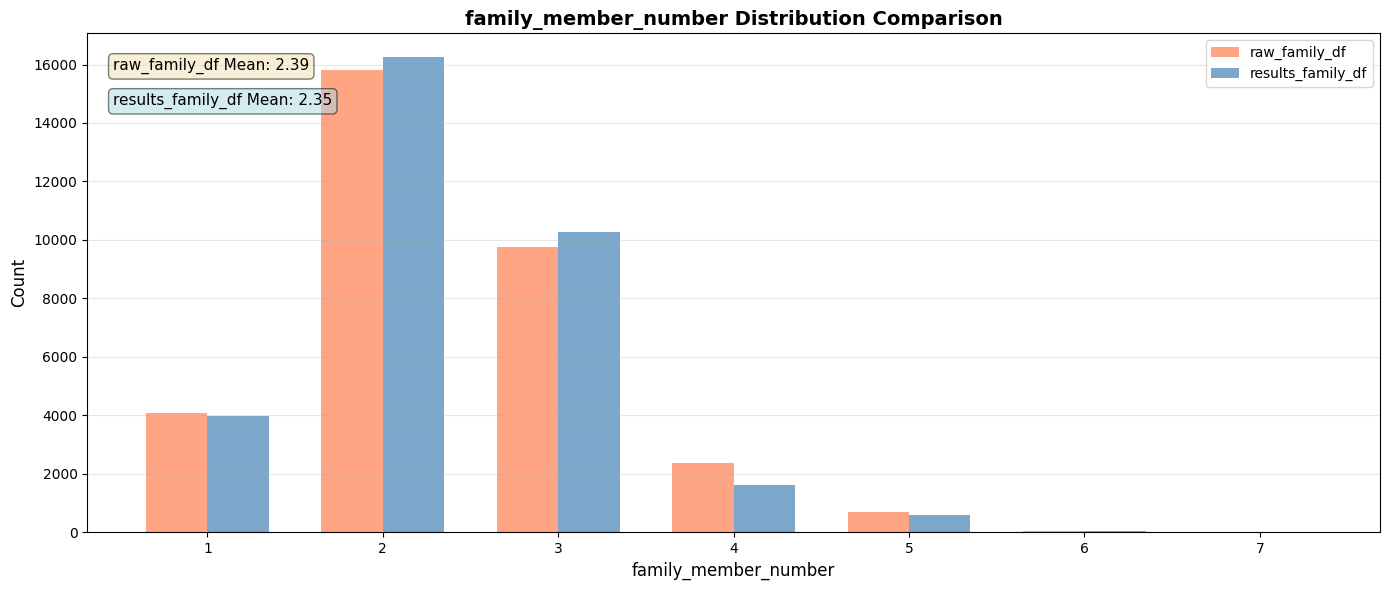

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_家庭成员数量'].value_counts().sort_index()
results_age_counts = results_family_df['family_家庭成员数量'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_家庭成员数量'].mean()
results_mean = results_family_df['family_家庭成员数量'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_member_number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_member_number Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

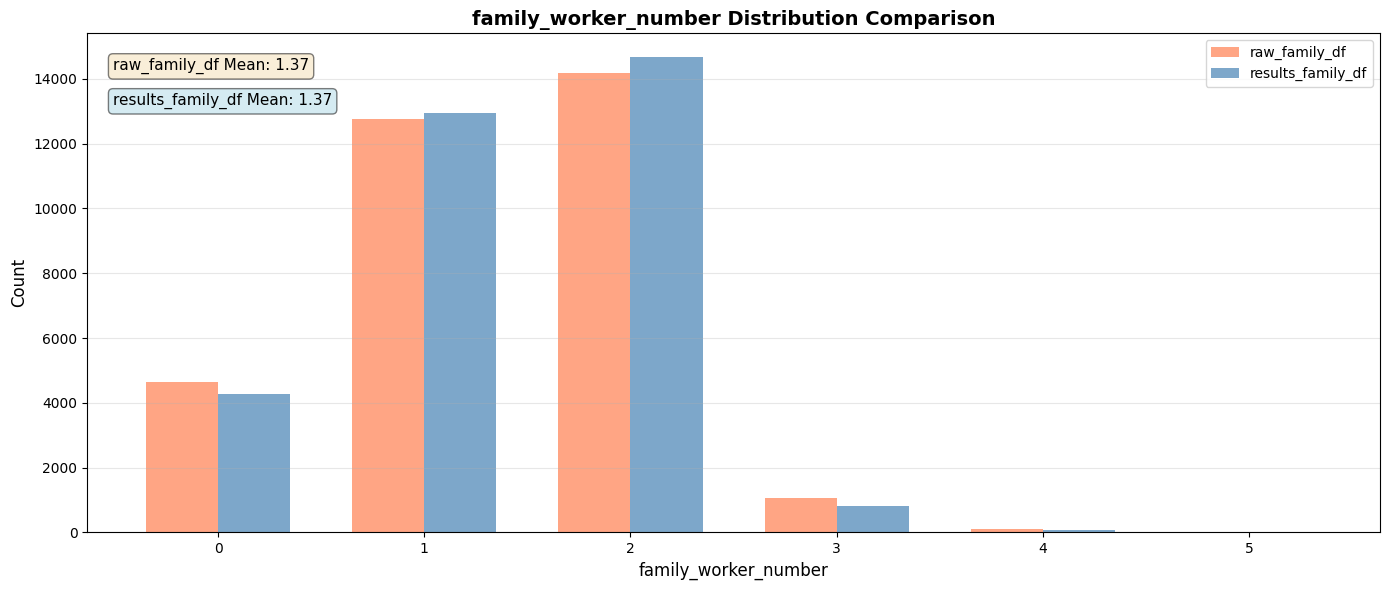

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_家庭工作人口数'].value_counts().sort_index()
results_age_counts = results_family_df['family_家庭工作人口数'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_家庭工作人口数'].mean()
results_mean = results_family_df['family_家庭工作人口数'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_worker_number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_worker_number Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

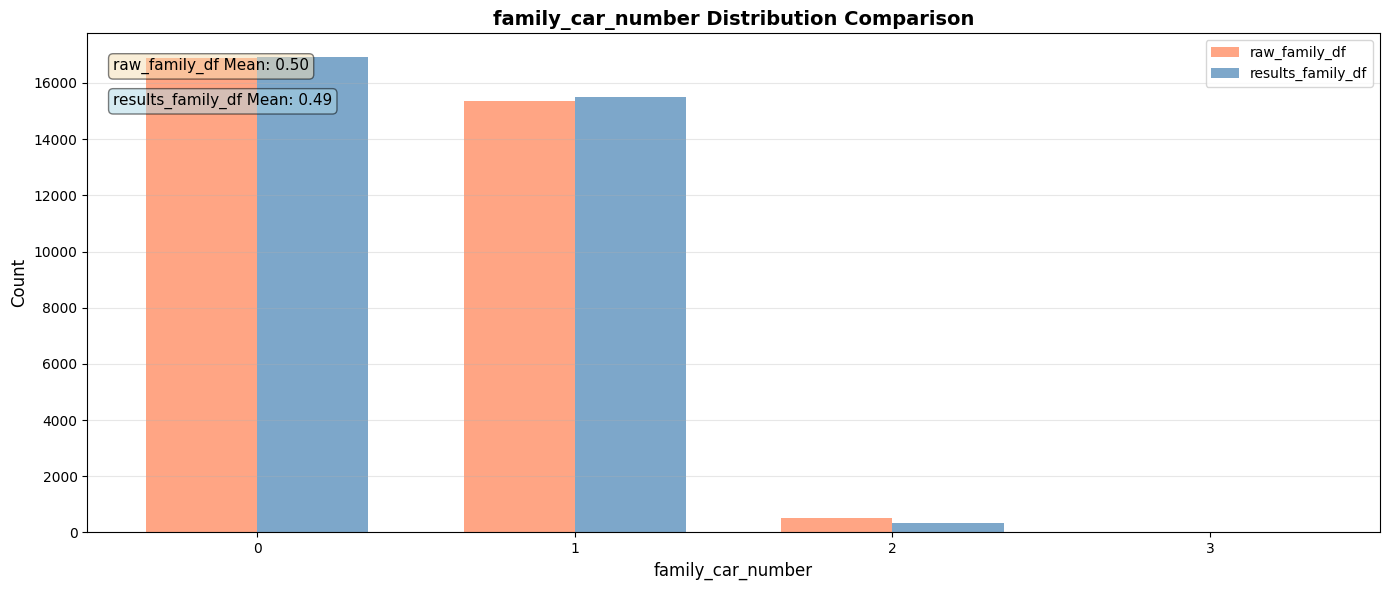

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_机动车数量'].value_counts().sort_index()
results_age_counts = results_family_df['family_机动车数量'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_机动车数量'].mean()
results_mean = results_family_df['family_机动车数量'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_car_number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_car_number Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

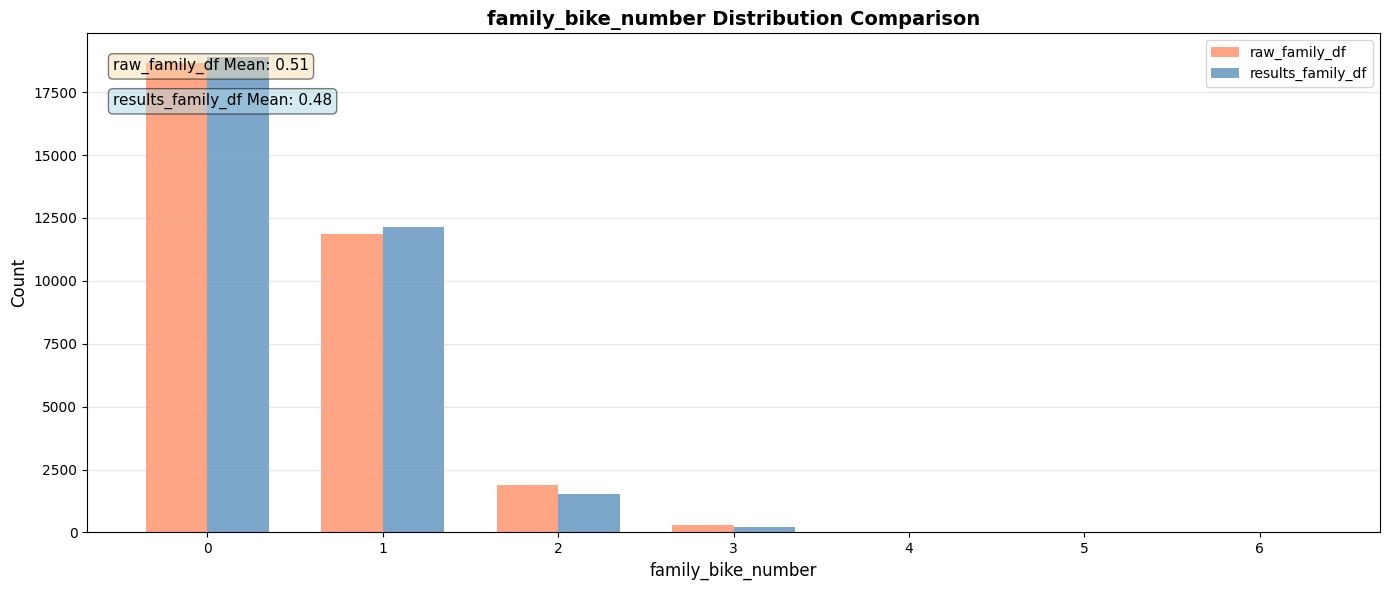

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_脚踏自行车数量'].value_counts().sort_index()
results_age_counts = results_family_df['family_脚踏自行车数量'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_脚踏自行车数量'].mean()
results_mean = results_family_df['family_脚踏自行车数量'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_bike_number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_bike_number Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

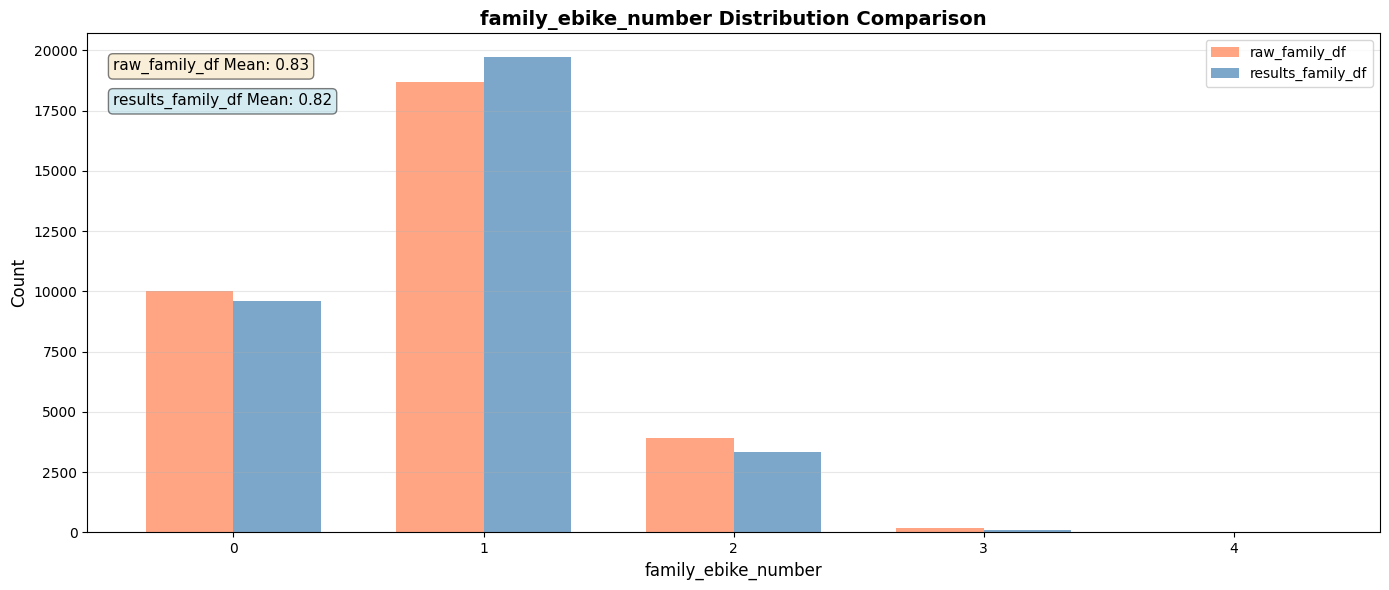

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_电动自行车数量'].value_counts().sort_index()
results_age_counts = results_family_df['family_电动自行车数量'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_电动自行车数量'].mean()
results_mean = results_family_df['family_电动自行车数量'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_ebike_number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_ebike_number Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

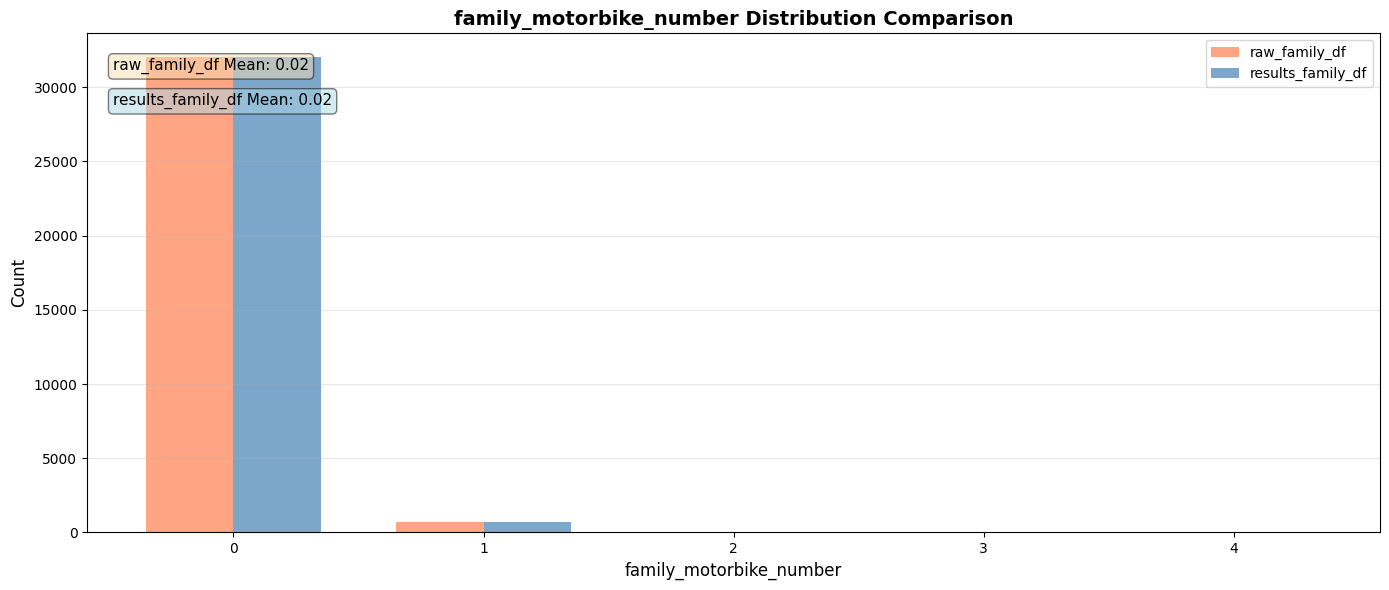

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_摩托车数量'].value_counts().sort_index()
results_age_counts = results_family_df['family_摩托车数量'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_摩托车数量'].mean()
results_mean = results_family_df['family_摩托车数量'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_motorbike_number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_motorbike_number Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

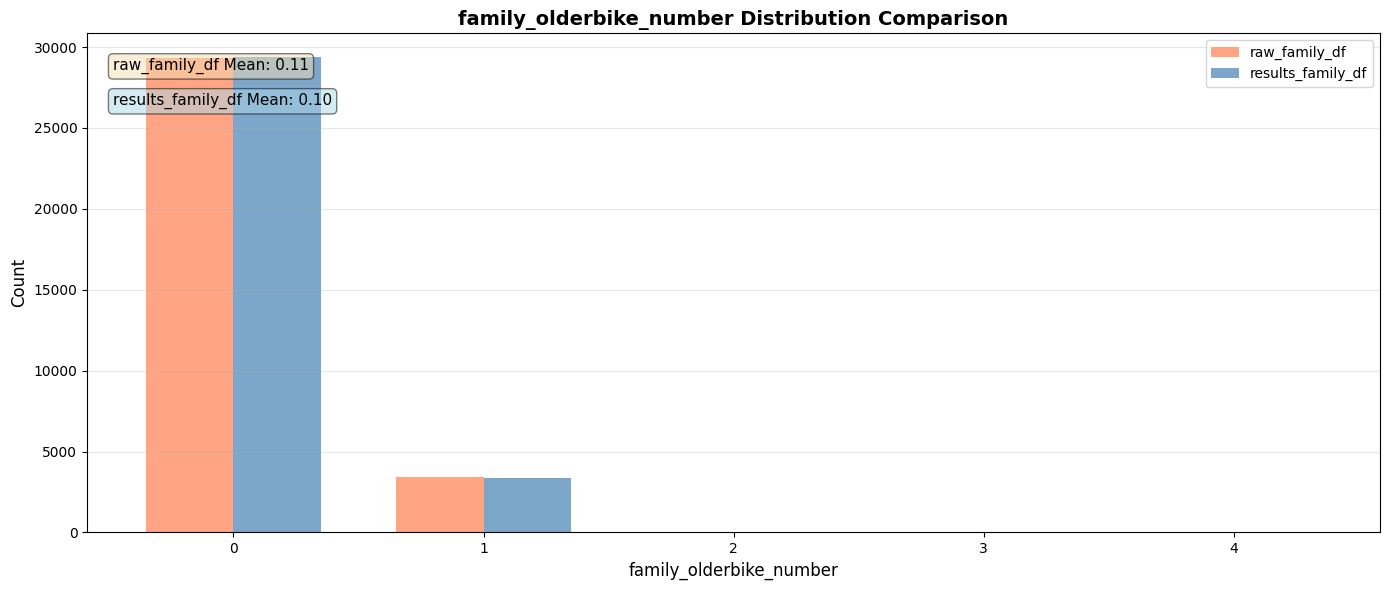

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_老年代步车数量'].value_counts().sort_index()
results_age_counts = results_family_df['family_老年代步车数量'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_老年代步车数量'].mean()
results_mean = results_family_df['family_老年代步车数量'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_olderbike_number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_olderbike_number Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

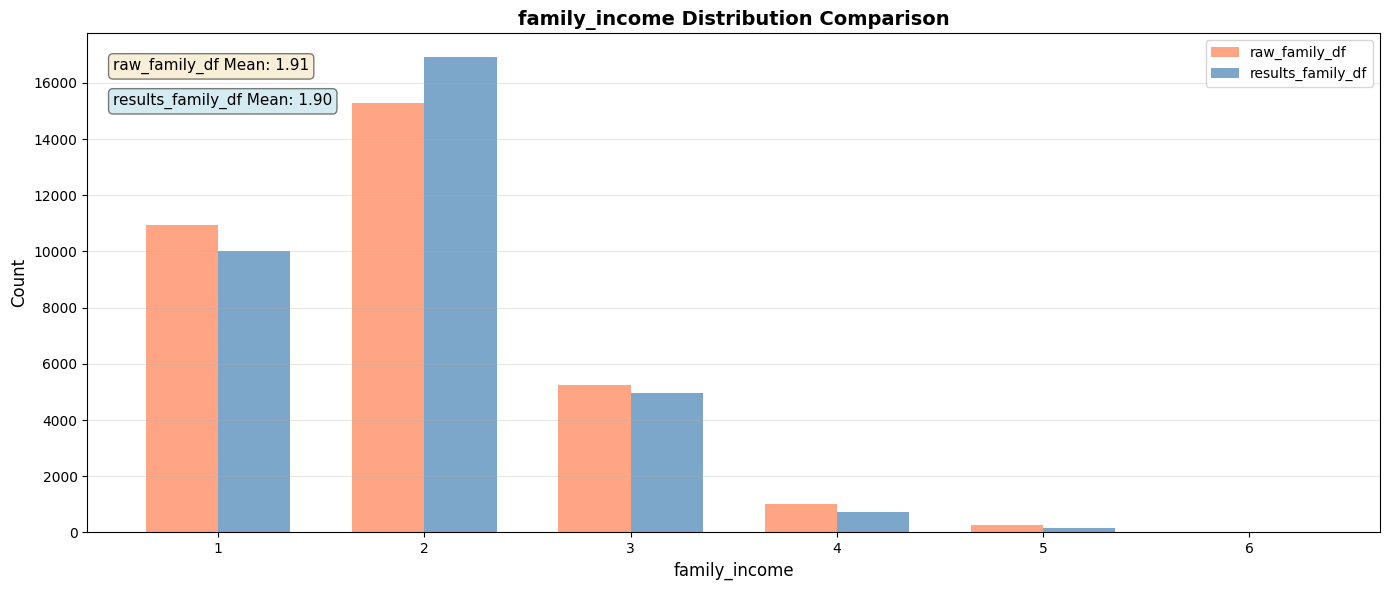

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_家庭年收入'].value_counts().sort_index()
results_age_counts = results_family_df['family_家庭年收入'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_家庭年收入'].mean()
results_mean = results_family_df['family_家庭年收入'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_income', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_income Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

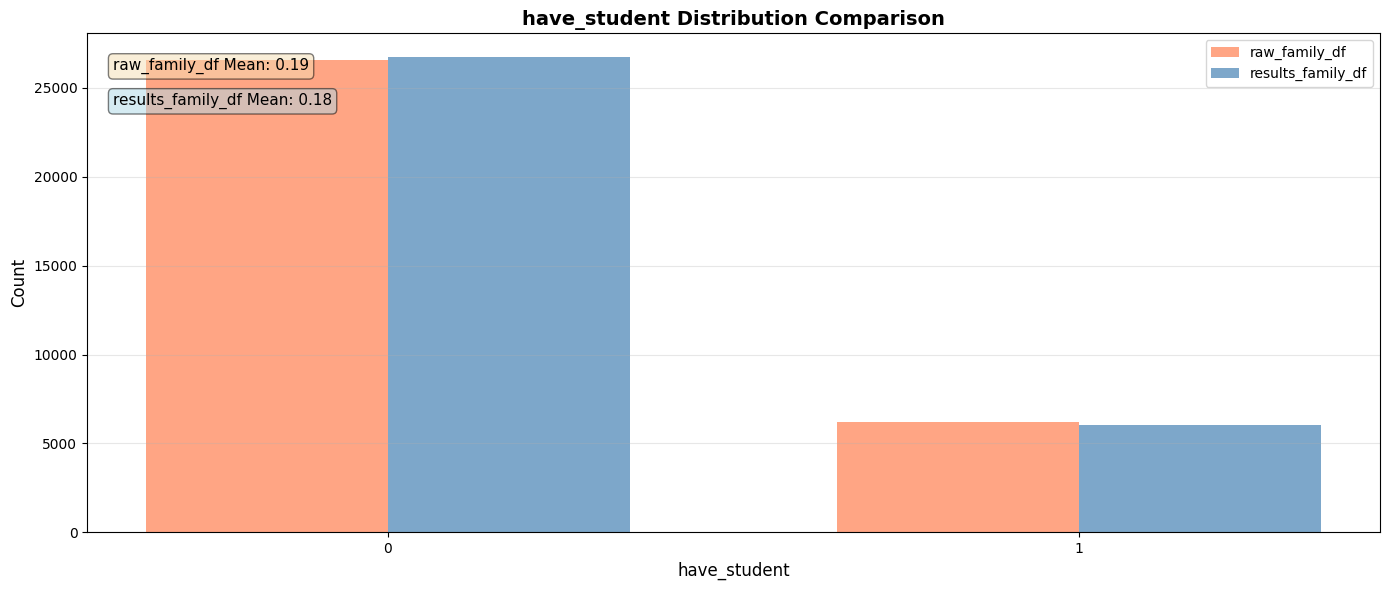

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['have_student'].value_counts().sort_index()
results_age_counts = results_family_df['have_student'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['have_student'].mean()
results_mean = results_family_df['have_student'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('have_student', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('have_student Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 个人的

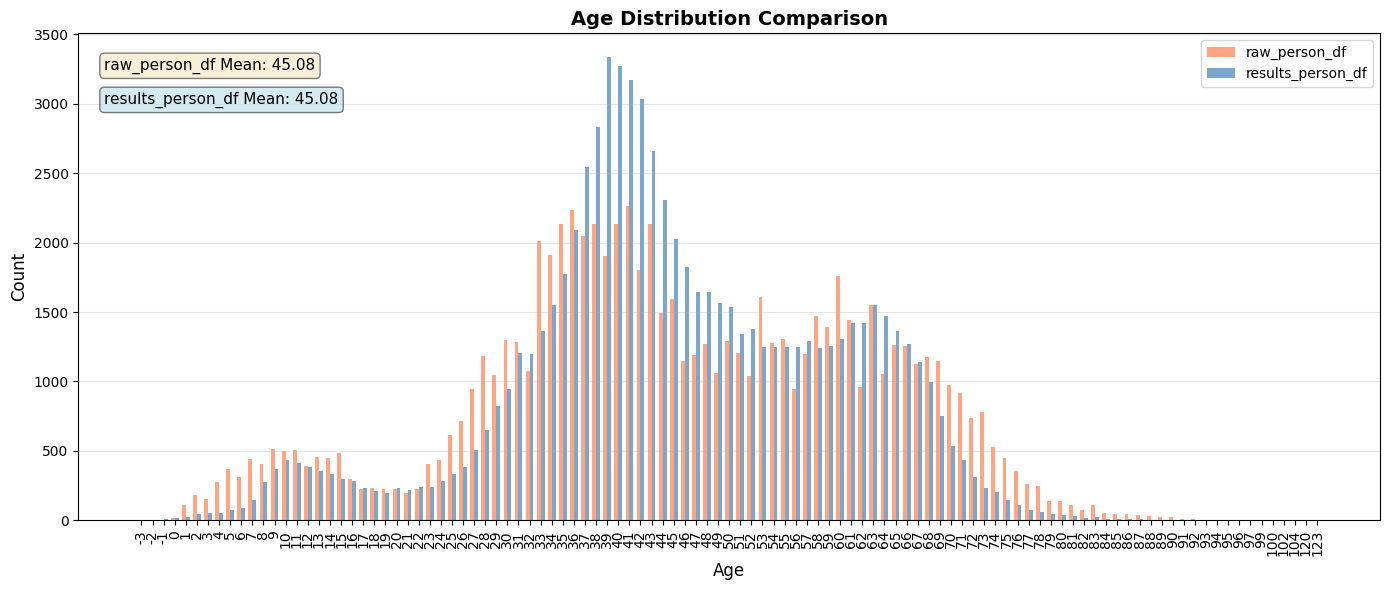

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_person_df['age'].value_counts().sort_index()
results_age_counts = results_person_df['age'].value_counts().sort_index()

# 计算均值
raw_mean = raw_person_df['age'].mean()
results_mean = results_person_df['age'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_person_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_person_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Age Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_person_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_person_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

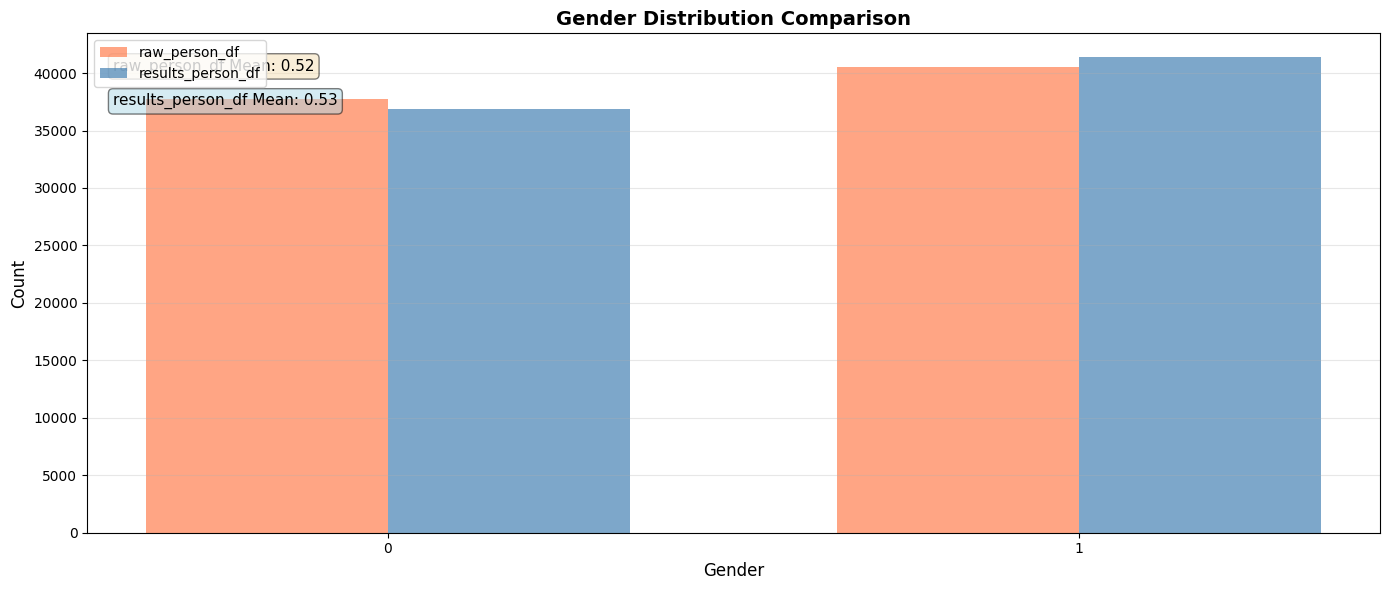

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_person_df['gender'].value_counts().sort_index()
results_age_counts = results_person_df['gender'].value_counts().sort_index()

# 计算均值
raw_mean = raw_person_df['gender'].mean()
results_mean = results_person_df['gender'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_person_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_person_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Gender Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_person_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_person_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

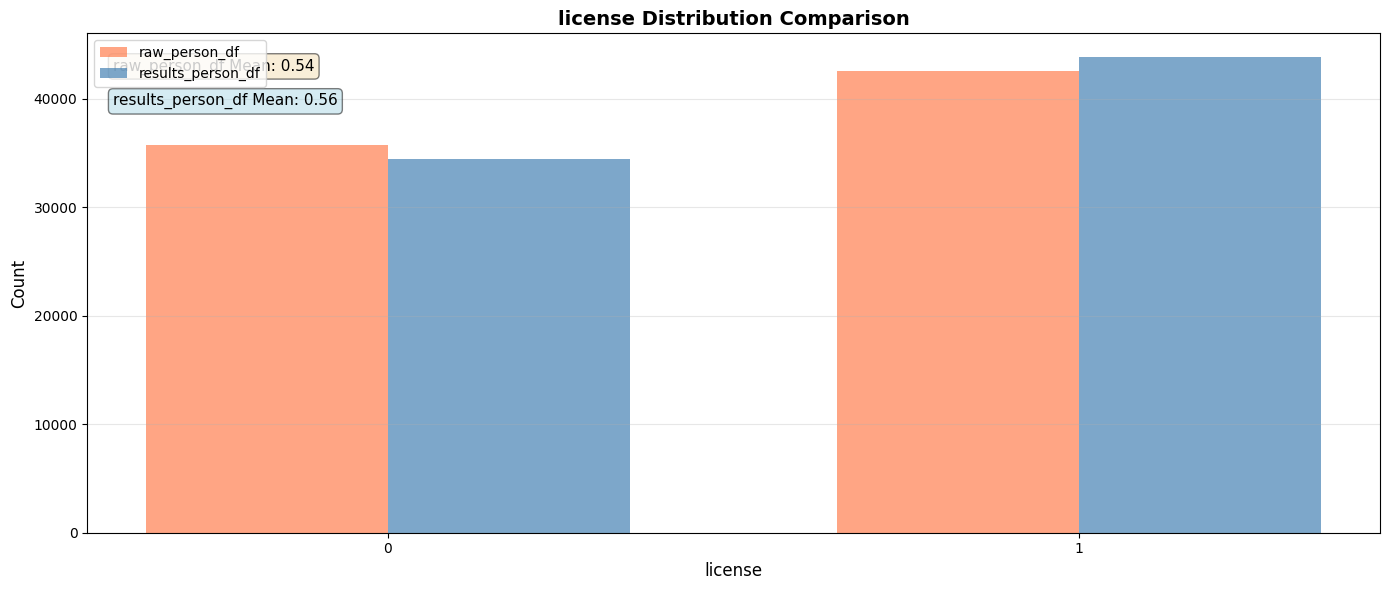

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_person_df['license'].value_counts().sort_index()
results_age_counts = results_person_df['license'].value_counts().sort_index()

# 计算均值
raw_mean = raw_person_df['license'].mean()
results_mean = results_person_df['license'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_person_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_person_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('license', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('license Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_person_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_person_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

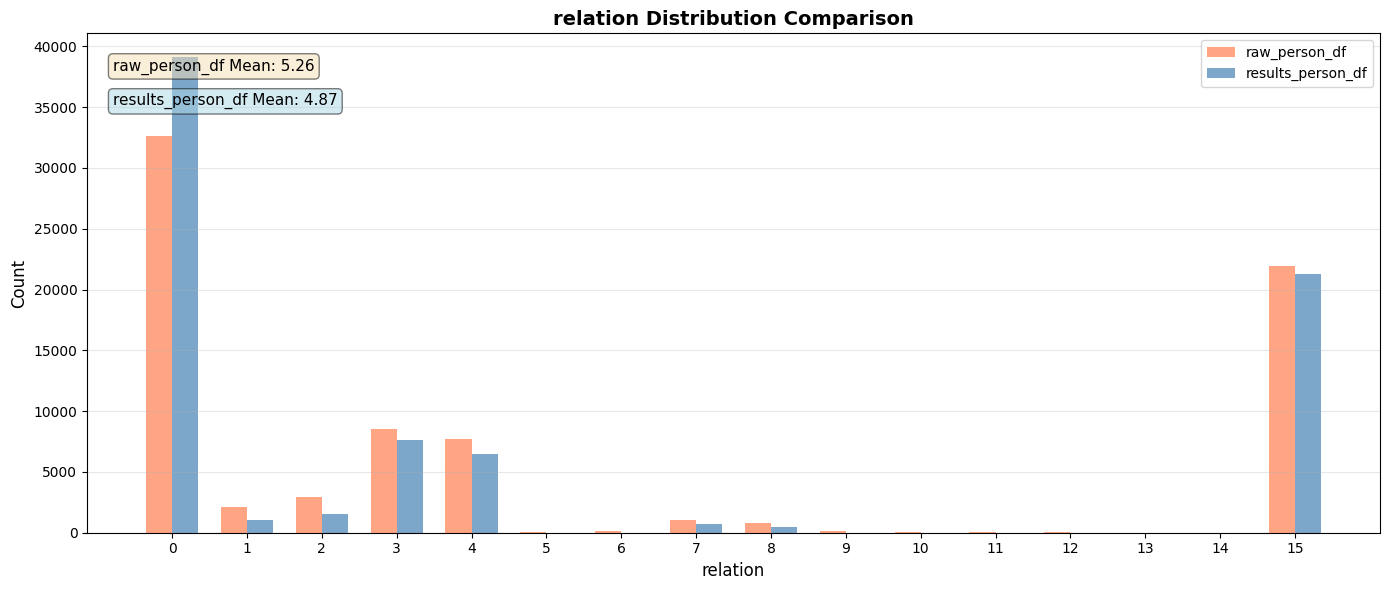

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_person_df['relation'].value_counts().sort_index()
results_age_counts = results_person_df['relation'].value_counts().sort_index()

# 计算均值
raw_mean = raw_person_df['relation'].mean()
results_mean = results_person_df['relation'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_person_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_person_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('relation', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('relation Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_person_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_person_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

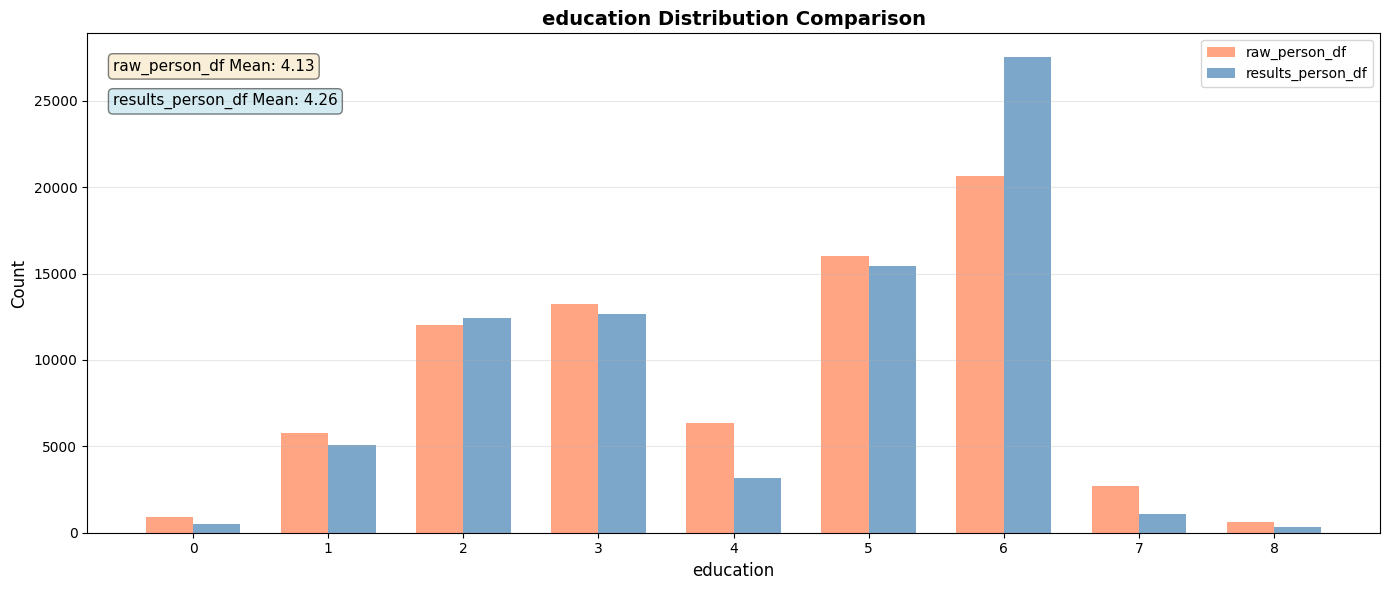

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_person_df['education'].value_counts().sort_index()
results_age_counts = results_person_df['education'].value_counts().sort_index()

# 计算均值
raw_mean = raw_person_df['education'].mean()
results_mean = results_person_df['education'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_person_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_person_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('education', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('education Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_person_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_person_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

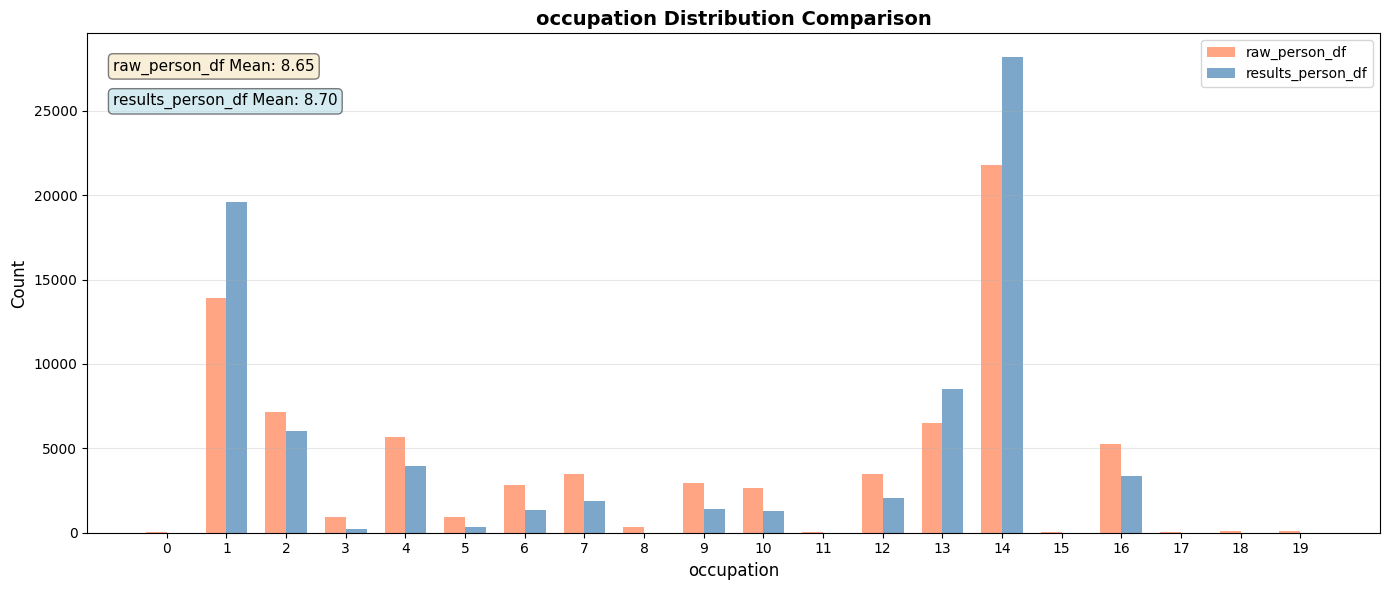

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_person_df['occupation'].value_counts().sort_index()
results_age_counts = results_person_df['occupation'].value_counts().sort_index()

# 计算均值
raw_mean = raw_person_df['occupation'].mean()
results_mean = results_person_df['occupation'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_person_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_person_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('occupation', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('occupation Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_person_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_person_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()